In [1]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress

# Import the API key
from config import car_key
from config import car_secret_key


In [2]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'pink']

In [3]:

# search base URL
base_url = f"https://mc-api.marketcheck.com/v2/popular/cars?api_key={car_key}&car_type=new&country=us"


response = requests.get(base_url).json()
print(base_url)
print(json.dumps(response, indent=4, sort_keys=True))


https://mc-api.marketcheck.com/v2/popular/cars?api_key=hkwHViWcszguqrfsvqvFnBmuRSQIVNZ8&car_type=new&country=us
[
    {
        "count": 130243,
        "country": "us",
        "dom_stats": {
            "geometric_mean": 22,
            "iqr": 20,
            "listings_count": 0,
            "max": 1678,
            "mean": 29,
            "median": 25,
            "min": 1,
            "population_standard_deviation": 28,
            "standard_deviation": 28,
            "trimmed_mean": 26,
            "variance": 793
        },
        "make": "Toyota",
        "miles_stats": {
            "geometric_mean": 6,
            "iqr": 7,
            "listings_count": 33450,
            "max": 140797,
            "mean": 112,
            "median": 5,
            "min": 1,
            "population_standard_deviation": 2310,
            "standard_deviation": 2310,
            "trimmed_mean": 6,
            "variance": 5333860
        },
        "model": "RAV4",
        "price_stats": {
     

In [4]:
top50_df = pd.DataFrame(response)
top50_df
# df_expanded = pd.concat([top50_df.drop(['price_stats'], axis=1), top50_df['price_stats'].apply(pd.Series)], axis=1)
# df_expanded = pd.concat([top50_df.drop(['miles_stats'], axis=1), top50_df['miles_stats'].apply(pd.Series)], axis=1)
# df_expanded = pd.concat([top50_df.drop(['dom_stats'], axis=1), top50_df['dom_stats'].apply(pd.Series)], axis=1)

# top50_df = pd.DataFrame(data_dict)

,country,count,make,model,price_stats,miles_stats,dom_stats
0,us,130243,Toyota,RAV4,"{'geometric_mean': 37359, 'listings_count': 12...","{'geometric_mean': 6, 'listings_count': 33450,...","{'geometric_mean': 22, 'listings_count': 0, 'm..."
1,us,100180,Honda,CR-V,"{'geometric_mean': 37651, 'listings_count': 94...","{'geometric_mean': 7, 'listings_count': 74781,...","{'geometric_mean': 29, 'listings_count': 0, 'm..."
2,us,90182,Ford,F-150,"{'geometric_mean': 58395, 'listings_count': 84...","{'geometric_mean': 22, 'listings_count': 53181...","{'geometric_mean': 58, 'listings_count': 0, 'm..."
3,us,87978,Chevrolet,Silverado 1500,"{'geometric_mean': 54091, 'listings_count': 85...","{'geometric_mean': 10, 'listings_count': 63799...","{'geometric_mean': 74, 'listings_count': 0, 'm..."
4,us,84085,Toyota,Camry,"{'geometric_mean': 35141, 'listings_count': 80...","{'geometric_mean': 6, 'listings_count': 18903,...","{'geometric_mean': 20, 'listings_count': 0, 'm..."
5,us,72847,Toyota,Tacoma,"{'geometric_mean': 46917, 'listings_count': 70...","{'geometric_mean': 6, 'listings_count': 18806,...","{'geometric_mean': 33, 'listings_count': 0, 'm..."
6,us,63018,Toyota,Corolla,"{'geometric_mean': 25300, 'listings_count': 60...","{'geometric_mean': 5, 'listings_count': 14370,...","{'geometric_mean': 22, 'listings_count': 0, 'm..."
7,us,59819,Toyota,Tundra,"{'geometric_mean': 61841, 'listings_count': 57...","{'geometric_mean': 6, 'listings_count': 17254,...","{'geometric_mean': 40, 'listings_count': 0, 'm..."
8,us,58530,Chevrolet,Trax,"{'geometric_mean': 24920, 'listings_count': 54...","{'geometric_mean': 7, 'listings_count': 40243,...","{'geometric_mean': 31, 'listings_count': 0, 'm..."
9,us,45637,Subaru,Crosstrek,"{'geometric_mean': 31772, 'listings_count': 44...","{'geometric_mean': 5, 'listings_count': 18215,...","{'geometric_mean': 50, 'listings_count': 0, 'm..."


In [5]:
df_expanded = pd.concat([top50_df.drop(['price_stats'], axis=1), top50_df['price_stats'].apply(pd.Series)], axis=1)
df_expanded = df_expanded.drop("miles_stats", axis=1)
df_expanded = df_expanded.drop("dom_stats", axis=1)
df_expanded

,country,count,make,model,geometric_mean,listings_count,min,median,population_standard_deviation,variance,max,mean,trimmed_mean,standard_deviation,iqr
0,us,130243,Toyota,RAV4,37359,124603,9988,36768,4952,24524202,63313,37664,37159,4952,6008
1,us,100180,Honda,CR-V,37651,94027,5936,37850,3274,10721259,387000,37779,37833,3274,4395
2,us,90182,Ford,F-150,58395,84939,5250,57405,14650,214608035,214335,59938,58422,14650,16367
3,us,87978,Chevrolet,Silverado 1500,54091,85993,5995,54435,10177,103573151,681000,54933,54673,10177,13609
4,us,84085,Toyota,Camry,35141,80627,5999,34638,3616,13078946,80350,35323,35135,3616,4953
5,us,72847,Toyota,Tacoma,46917,70017,11289,46624,6092,37117152,89995,47297,47032,6092,7933
6,us,63018,Toyota,Corolla,25300,60619,7985,24810,2064,4261941,55306,25379,25157,2064,2719
7,us,59819,Toyota,Tundra,61841,57842,6950,61935,7618,58040067,324849,62294,61984,7618,10521
8,us,58530,Chevrolet,Trax,24920,54950,5250,25035,1977,3910304,256230,24984,25060,1977,2453
9,us,45637,Subaru,Crosstrek,31772,44665,12500,31667,3805,14477512,362227,31940,31966,3805,5233


In [6]:
top5_2024 = df_expanded.head(10)
top5_2024


,country,count,make,model,geometric_mean,listings_count,min,median,population_standard_deviation,variance,max,mean,trimmed_mean,standard_deviation,iqr
0,us,130243,Toyota,RAV4,37359,124603,9988,36768,4952,24524202,63313,37664,37159,4952,6008
1,us,100180,Honda,CR-V,37651,94027,5936,37850,3274,10721259,387000,37779,37833,3274,4395
2,us,90182,Ford,F-150,58395,84939,5250,57405,14650,214608035,214335,59938,58422,14650,16367
3,us,87978,Chevrolet,Silverado 1500,54091,85993,5995,54435,10177,103573151,681000,54933,54673,10177,13609
4,us,84085,Toyota,Camry,35141,80627,5999,34638,3616,13078946,80350,35323,35135,3616,4953
5,us,72847,Toyota,Tacoma,46917,70017,11289,46624,6092,37117152,89995,47297,47032,6092,7933
6,us,63018,Toyota,Corolla,25300,60619,7985,24810,2064,4261941,55306,25379,25157,2064,2719
7,us,59819,Toyota,Tundra,61841,57842,6950,61935,7618,58040067,324849,62294,61984,7618,10521
8,us,58530,Chevrolet,Trax,24920,54950,5250,25035,1977,3910304,256230,24984,25060,1977,2453
9,us,45637,Subaru,Crosstrek,31772,44665,12500,31667,3805,14477512,362227,31940,31966,3805,5233


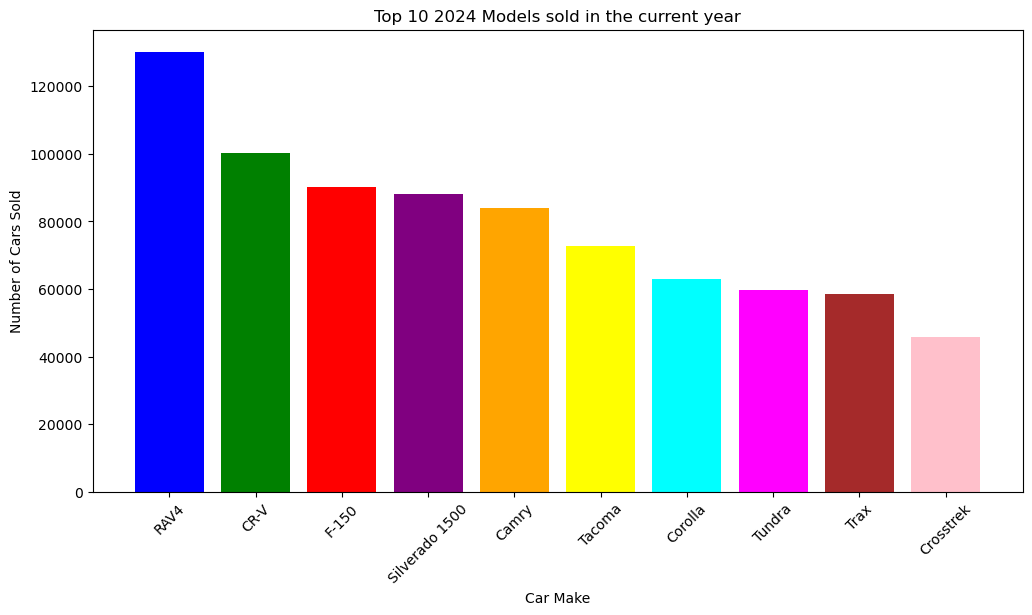

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(top5_2024['model'], top5_2024['count'], color=colors)
plt.title('Top 10 2024 Models sold in the current year')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

(-1.099998440490482,
 1.0999999150793702,
 -1.0999991497036314,
 1.0999999595050427)

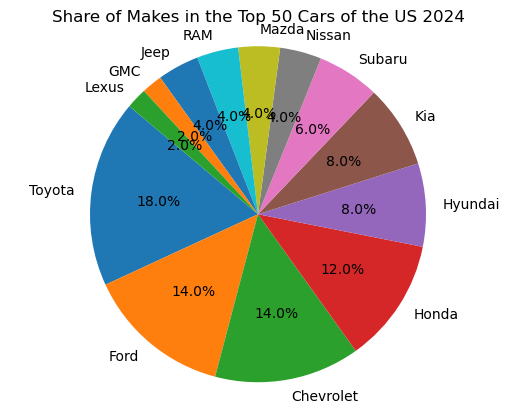

In [8]:
Make_top_50 = df_expanded['make'].value_counts()
Make_top_50
plt.title("Share of Makes in the Top 50 Cars of the US 2024")
plt.pie(Make_top_50, labels=Make_top_50.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

<Figure size 1000x600 with 0 Axes>

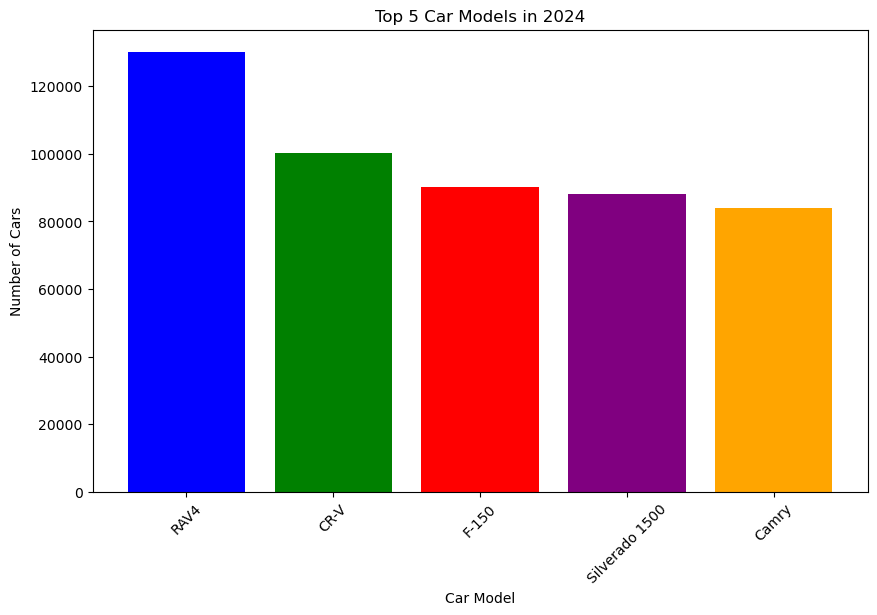

In [9]:
plt.figure(figsize=(10, 6))  # Set the figure size
top_5_cars = df_expanded.head(5)  # Select the top 5 cars

plt.figure(figsize=(10, 6))  # Set the figure size

plt.bar(top_5_cars['model'], top_5_cars['count'], color = colors)  # Create the bar chart for the top 5 cars

plt.xlabel('Car Model')  # Set the x-axis label
plt.ylabel('Number of Cars')  # Set the y-axis label
plt.title('Top 5 Car Models in 2024')  # Set the title

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()  # Display the plot

In [10]:
cars_clean_df = pd.read_csv('Resources/car_sales_clean.csv')
cars_clean_df


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),Sedan
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Truck
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),SUV
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Sedan


In [11]:
df_by_year = {year: group for year, group in cars_clean_df.groupby('year')}
df_by_year
     
    



{1990:         year           make            model           trim         body  \
 17756   1990         Toyota            Camry         Deluxe        Sedan   
 17759   1990          Honda           Accord             EX        Sedan   
 32378   1990         Toyota            Camry         Deluxe        Sedan   
 32379   1990      Chevrolet         Corvette           Base    Hatchback   
 41812   1990          Honda           Accord             LX        Sedan   
 41816   1990  Mercedes-Benz        300-Class           300E        Sedan   
 41817   1990          Lexus           LS 400           Base        Sedan   
 57280   1990          Honda           Accord             EX        Sedan   
 64529   1990         Toyota          Corolla           Base        Sedan   
 84461   1990       Cadillac          DeVille           Base        Sedan   
 108714  1990         Toyota          Corolla         Deluxe        Sedan   
 108722  1990          Lexus           LS 400           Base        Se

In [12]:
#Data Analysis for Car Sales in 2010
# Dropping columns from the DataFrame
car_sales_2005_df = df_by_year[2005][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2005_df
make2005_counts = car_sales_2005_df["make"].value_counts().head(10)
price_mean_2005 = car_sales_2005_df['sellingprice'].mean()
print(price_mean_2005)

4881.957889218941


In [13]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'pink']

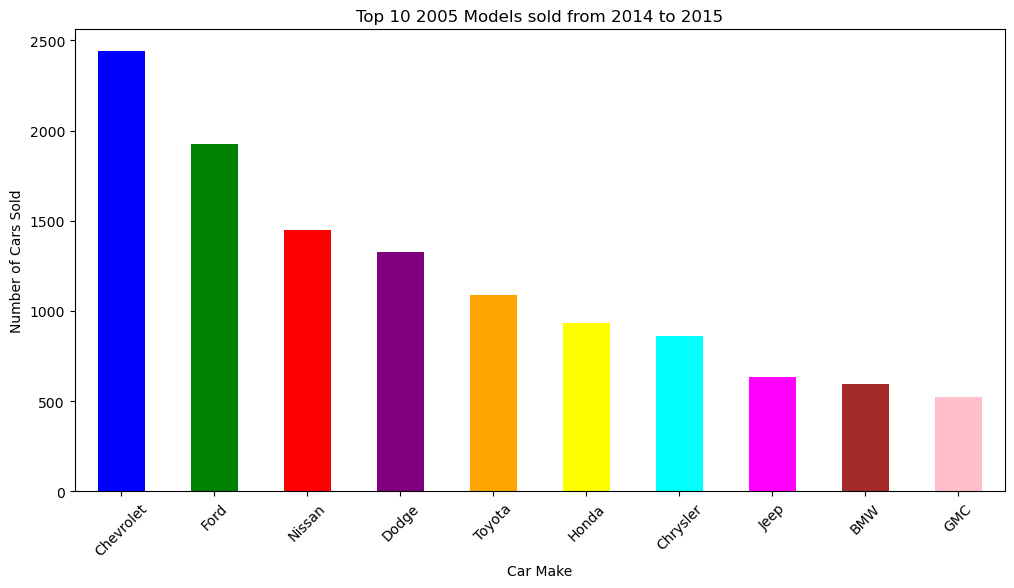

In [14]:
plt.figure(figsize=(12, 6))
make2005_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2005 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [15]:
car_sales_2006_df = df_by_year[2006][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2006_df
make2006_counts = car_sales_2006_df["make"].value_counts().head(10)
make2006_counts

make
Chevrolet        2521
Ford             2458
Nissan           1504
Dodge            1446
Toyota           1272
BMW              1260
Chrysler         1140
Honda             978
Mercedes-Benz     950
Jeep              788
Name: count, dtype: int64

In [16]:
price_mean_2006 = car_sales_2006_df['sellingprice'].mean()
print(price_mean_2006)

5993.042808931626


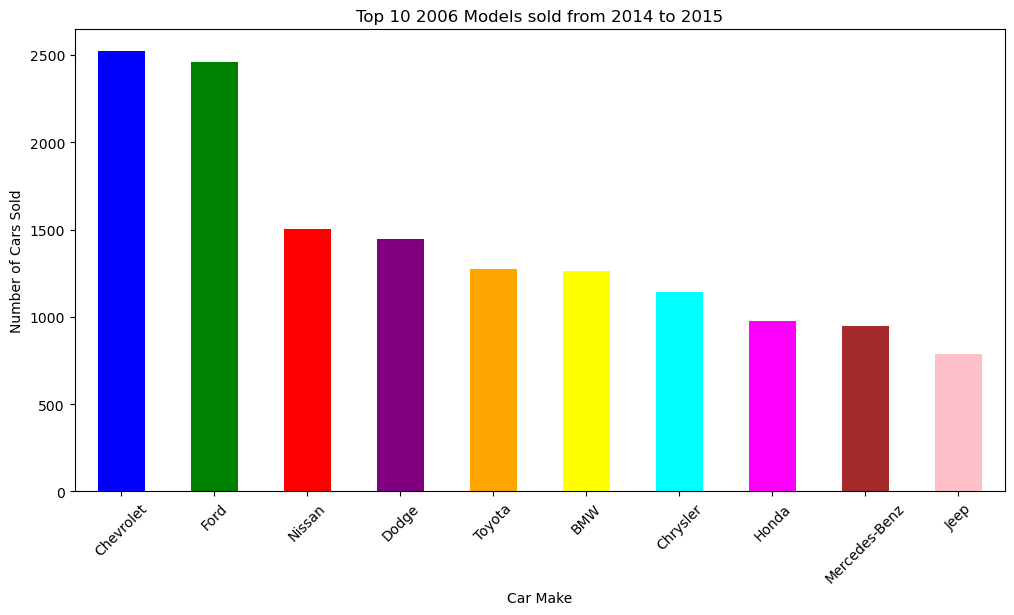

In [17]:
plt.figure(figsize=(12, 6))
make2006_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2006 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [18]:
car_sales_2007_df = df_by_year[2007][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2007_df
make2007_counts = car_sales_2007_df["make"].value_counts().head(10)
make2007_counts

make
Chevrolet    3598
Ford         2563
Toyota       1882
Dodge        1583
Nissan       1486
Honda        1478
BMW          1296
Chrysler     1237
Jeep         1060
GMC           918
Name: count, dtype: int64

In [19]:
price_mean_2007 = car_sales_2007_df['sellingprice'].mean()
print(price_mean_2007)

7861.239853416345


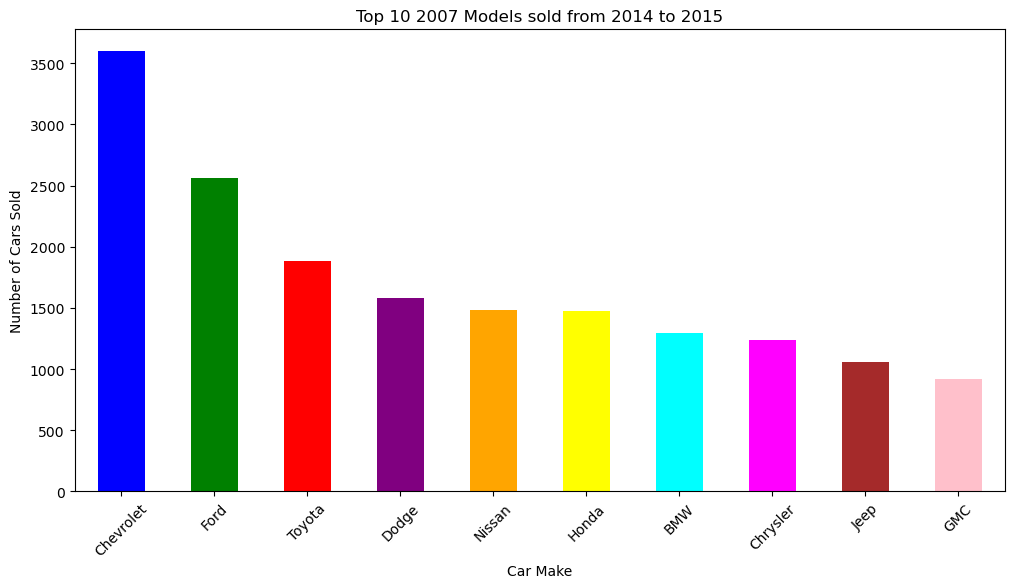

In [20]:
plt.figure(figsize=(12, 6))
make2007_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2007 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [21]:
car_sales_2008_df = df_by_year[2008][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2008_df
make2008_counts = car_sales_2008_df["make"].value_counts().head(10)
make2008_counts

make
Chevrolet        3669
Ford             3237
Dodge            2053
Honda            1537
Toyota           1533
BMW              1483
Chrysler         1197
Nissan           1191
Mercedes-Benz    1088
Jeep             1054
Name: count, dtype: int64

In [22]:
price_mean_2008 = car_sales_2008_df['sellingprice'].mean()
print(price_mean_2008)

9458.500055532932


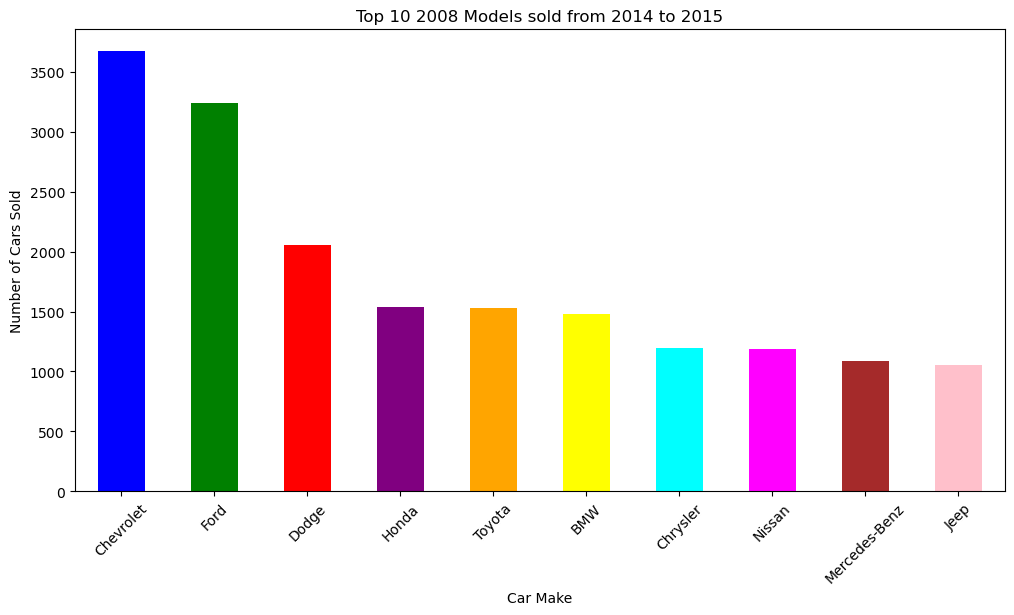

In [23]:
plt.figure(figsize=(12, 6))
make2008_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2008 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [24]:
car_sales_2009_df = df_by_year[2009][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2009_df
make2009_counts = car_sales_2009_df["make"].value_counts().head(10)
make2009_counts

make
Chevrolet        2746
Ford             1933
Toyota           1745
Dodge            1299
Honda            1170
Nissan           1061
BMW               736
Mercedes-Benz     647
Hyundai           641
Volkswagen        600
Name: count, dtype: int64

In [25]:
price_mean_2009 = car_sales_2009_df['sellingprice'].mean()
print(price_mean_2009)

10227.297176902946


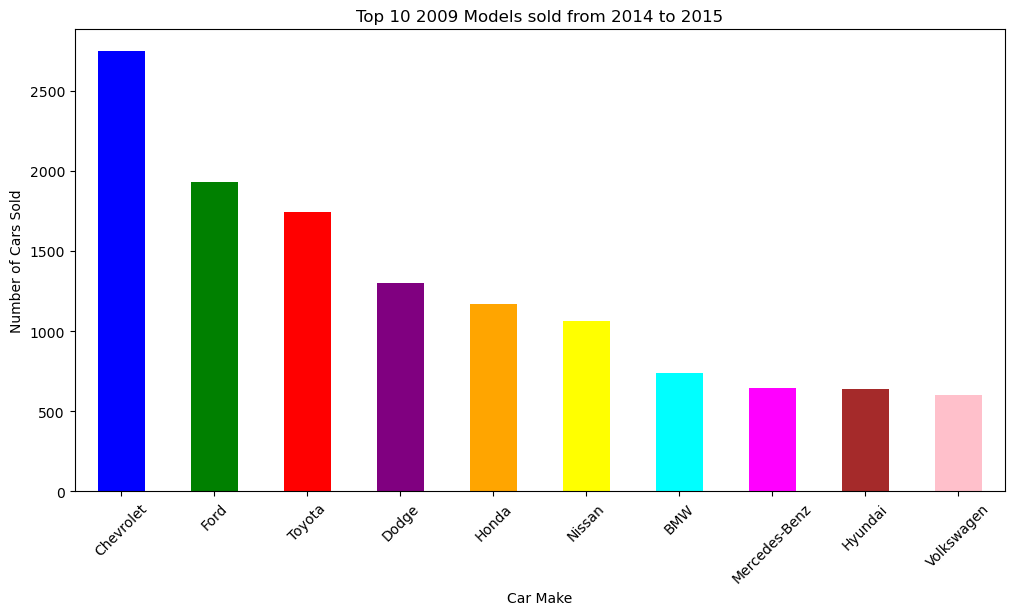

In [26]:
plt.figure(figsize=(12, 6))
make2009_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2009 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [27]:
car_sales_2010_df = df_by_year[2010][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2010_df
make2010_counts = car_sales_2010_df["make"].value_counts().head(10)
make2010_counts

make
Ford             3534
Chevrolet        3347
Dodge            2421
Toyota           1991
Honda            1313
Nissan           1271
Hyundai           740
Mercedes-Benz     738
Jeep              730
Chrysler          724
Name: count, dtype: int64

In [28]:
price_mean_2010 = car_sales_2010_df['sellingprice'].mean()
print(price_mean_2010)

12254.805270604882


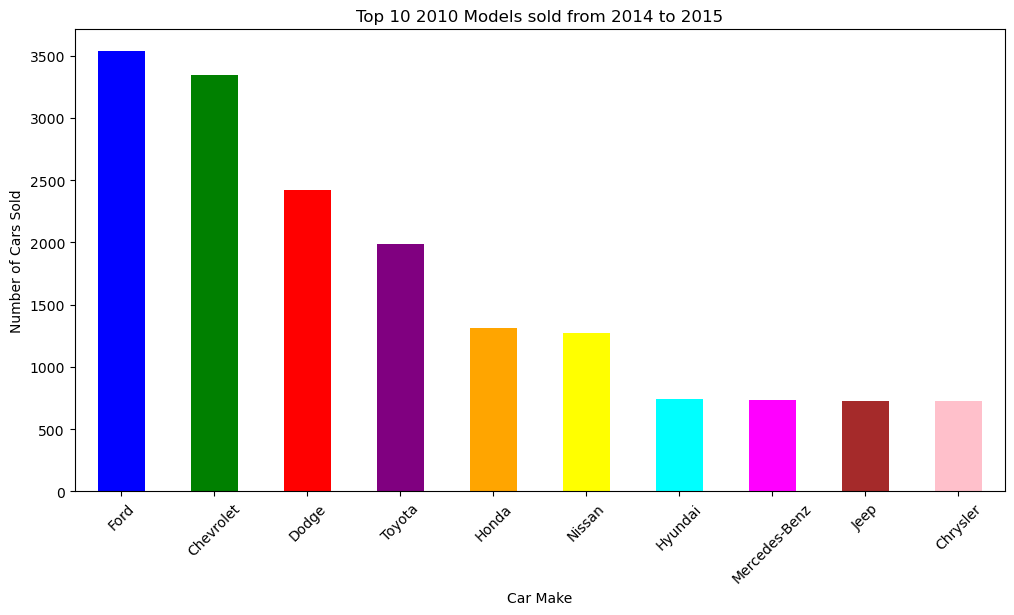

In [29]:
plt.figure(figsize=(12, 6))
make2010_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2010 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [30]:
car_sales_2011_df = df_by_year[2011][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2011_df
make2011_counts = car_sales_2011_df["make"].value_counts().head(10)
make2011_counts

make
Ford             6685
Chevrolet        4892
Nissan           4825
Toyota           3829
Infiniti         2633
BMW              2215
Honda            1563
Dodge            1476
Hyundai          1440
Mercedes-Benz    1310
Name: count, dtype: int64

In [31]:
price_mean_2011 = car_sales_2011_df['sellingprice'].mean()
print(price_mean_2011)

15690.067973129711


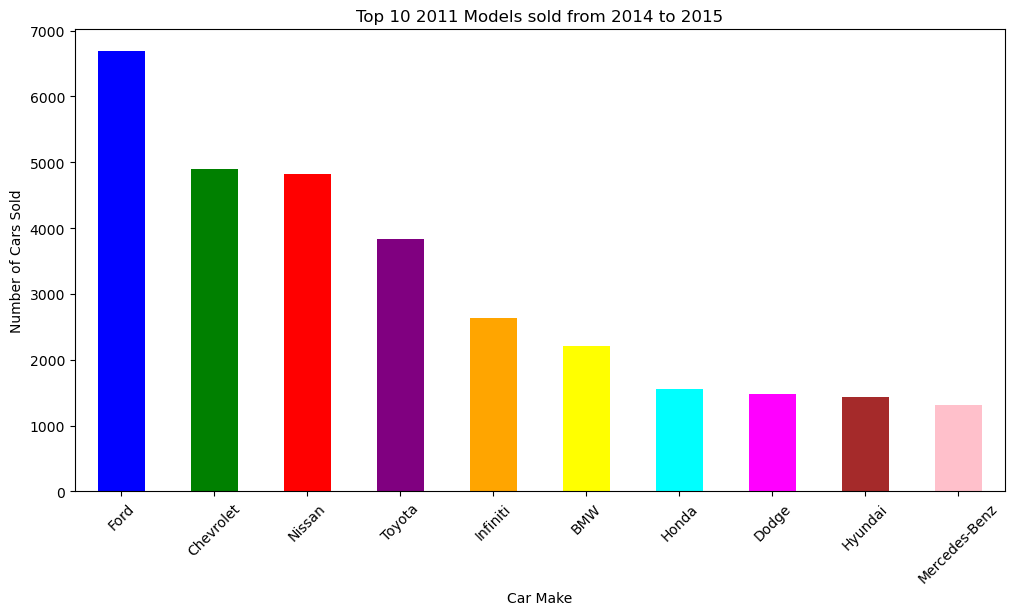

In [32]:
plt.figure(figsize=(12, 6))
make2011_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2011 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [33]:
car_sales_2012_df = df_by_year[2012][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2012_df
make2012_counts = car_sales_2012_df["make"].value_counts().head(10)
make2012_counts

make
Ford             14640
Nissan           13785
Honda             7994
Toyota            6675
Chevrolet         6359
Infiniti          4106
BMW               3720
Hyundai           3459
Dodge             2742
Mercedes-Benz     2641
Name: count, dtype: int64

In [34]:
price_mean_2012 = car_sales_2012_df['sellingprice'].mean()
print(price_mean_2012)

16441.895021744105


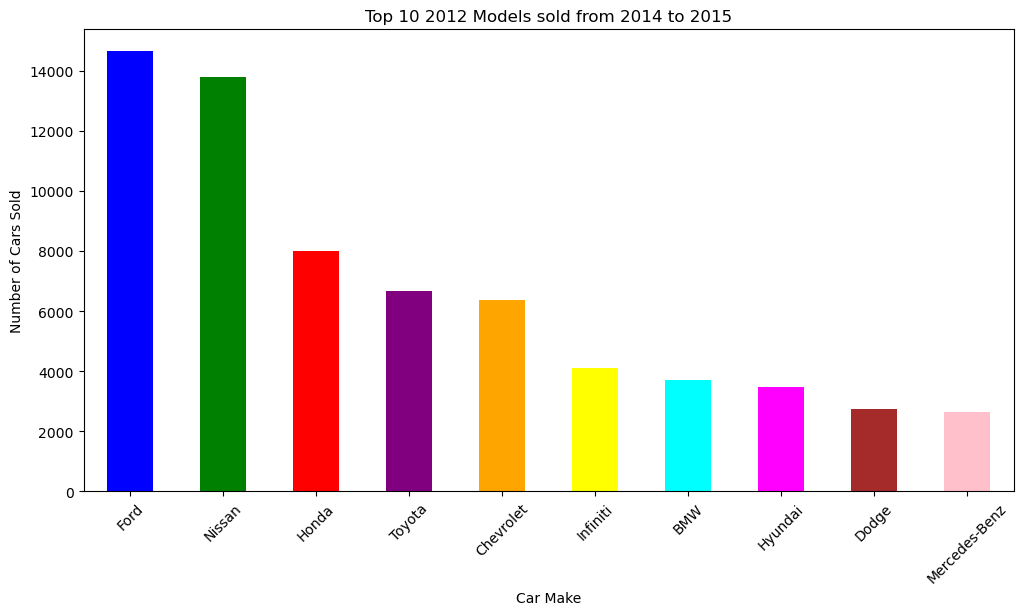

In [35]:
plt.figure(figsize=(12, 6))
make2012_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2012 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [36]:
car_sales_2013_df = df_by_year[2013][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2013_df
make2013_counts = car_sales_2013_df["make"].value_counts().head(10)
make2013_counts


make
Ford             20459
Chevrolet         9823
Nissan            9759
Hyundai           6869
Toyota            6174
Dodge             5432
Infiniti          3982
Kia               2747
Chrysler          2726
Mercedes-Benz     2491
Name: count, dtype: int64

In [37]:
price_mean_2013 = car_sales_2013_df['sellingprice'].mean()
print(price_mean_2013)

17319.47609955755


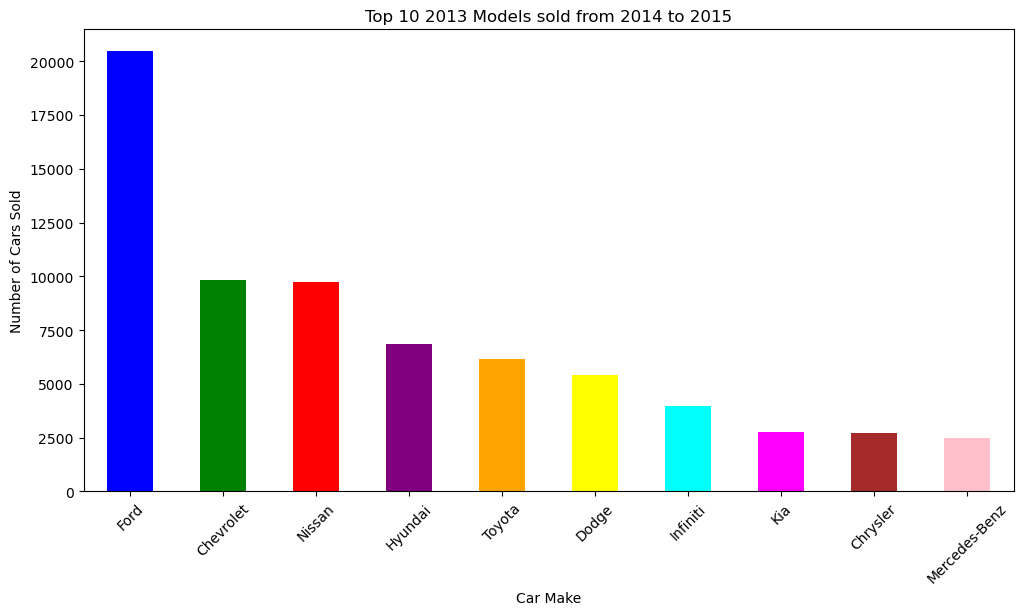

In [38]:
plt.figure(figsize=(12, 6))
make2013_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2013 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [39]:
car_sales_2014_df = df_by_year[2014][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2014_df
make2014_counts = car_sales_2014_df["make"].value_counts().head(10)
make2014_counts


make
Ford         17179
Chevrolet     8344
Dodge         5542
Kia           5468
Toyota        5244
Nissan        4504
Chrysler      3664
Jeep          2558
Hyundai       2316
BMW           1484
Name: count, dtype: int64

In [40]:
price_mean_2014 = car_sales_2014_df['sellingprice'].mean()
print(price_mean_2014)

19902.62274787698


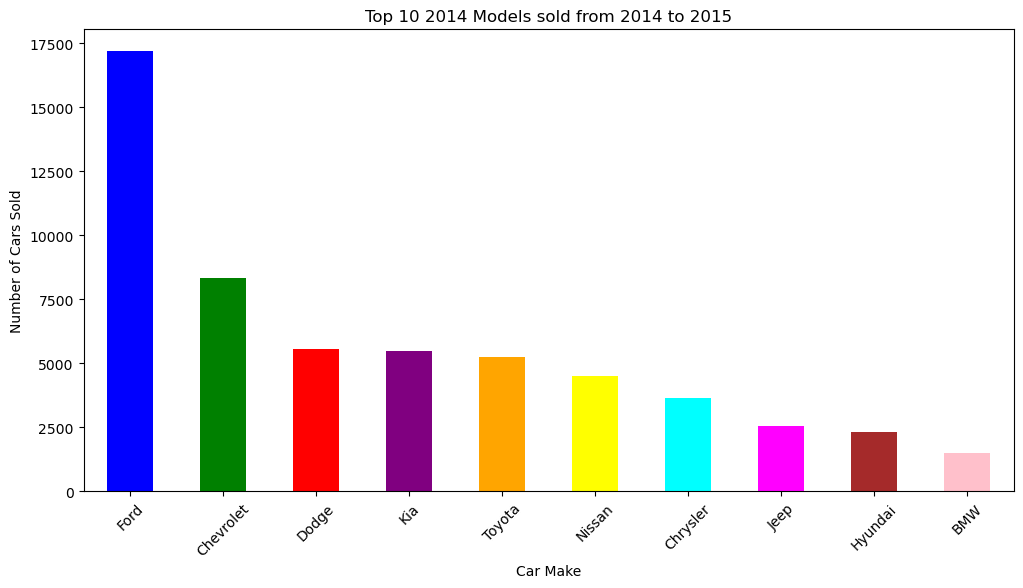

In [41]:
plt.figure(figsize=(12, 6))
make2014_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2014 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [42]:
car_sales_2015_df = df_by_year[2015][["year","make", "model", "state", "color", "mmr", "sellingprice", "saledate", "type"]].copy()
car_sales_2015_df
make2015_counts = car_sales_2015_df["make"].value_counts().head(10)
make2015_counts


make
Chevrolet    1256
Kia          1254
Ford          906
BMW           601
Nissan        499
Hyundai       443
Chrysler      404
Mazda         333
Volvo         317
Jeep          289
Name: count, dtype: int64

In [43]:
price_mean_2015 = car_sales_2015_df['sellingprice'].mean()
print(price_mean_2015)

26168.987990993246


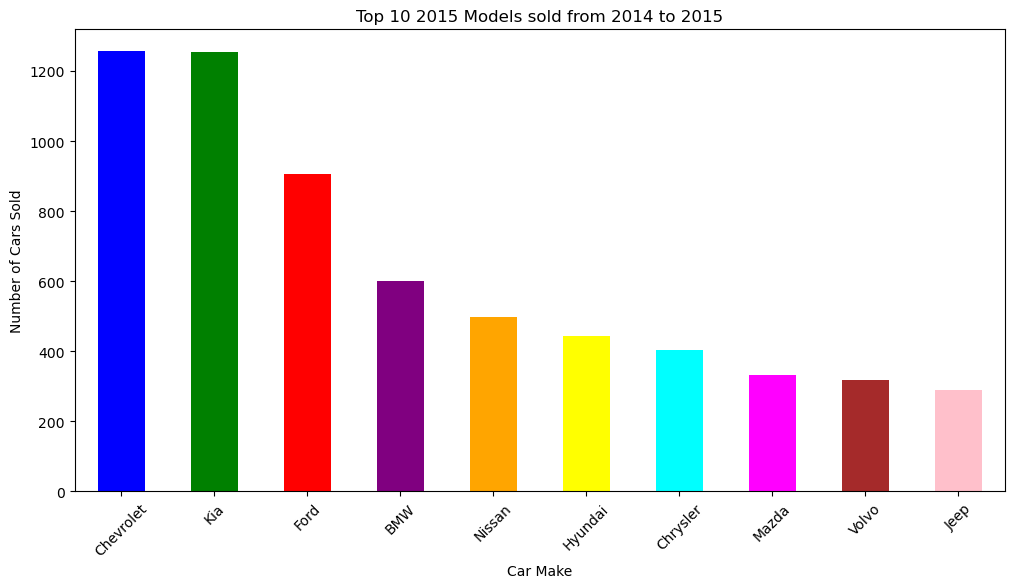

In [44]:
plt.figure(figsize=(12, 6))
make2015_counts.plot(kind='bar', color=colors)
plt.title('Top 10 2015 Models sold from 2014 to 2015')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [45]:
# total_cars_by_model_year=[]
# years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
# for year in df_by_year[years]:
#     total_cars_by_model_year[year] = df_by_year[years]['make'].count()

# total_cars_by_model_year
total_cars_by_model_year = {}
price_mean_by_year = {}

for year, group_data in cars_clean_df.groupby('year'):
    total_cars_by_model_year[year] = group_data['make'].count()
    price_mean_by_year[year] = group_data['sellingprice'].mean()
print(total_cars_by_model_year)
print(price_mean_by_year)

{1990: 33, 1991: 51, 1992: 97, 1993: 127, 1994: 286, 1995: 483, 1996: 562, 1997: 1042, 1998: 1464, 1999: 2227, 2000: 3427, 2001: 5140, 2002: 7693, 2003: 10368, 2004: 13624, 2005: 17169, 2006: 21631, 2007: 25378, 2008: 27011, 2009: 17959, 2010: 22616, 2011: 41384, 2012: 87380, 2013: 87467, 2014: 69712, 2015: 7994}
{1990: 1429.5454545454545, 1991: 994.6078431372549, 1992: 874.7422680412371, 1993: 777.3622047244095, 1994: 856.4685314685315, 1995: 875.9316770186335, 1996: 922.8647686832741, 1997: 1081.333973128599, 1998: 1262.233606557377, 1999: 1520.4737314773238, 2000: 1783.1645754304056, 2001: 2161.770428015564, 2002: 2662.820746132848, 2003: 3395.4258294753085, 2004: 4317.718731650029, 2005: 4881.957889218941, 2006: 5993.042808931626, 2007: 7861.239853416345, 2008: 9458.500055532932, 2009: 10227.297176902946, 2010: 12254.805270604882, 2011: 15690.067973129711, 2012: 16441.895021744105, 2013: 17319.47609955755, 2014: 19902.62274787698, 2015: 26168.987990993246}


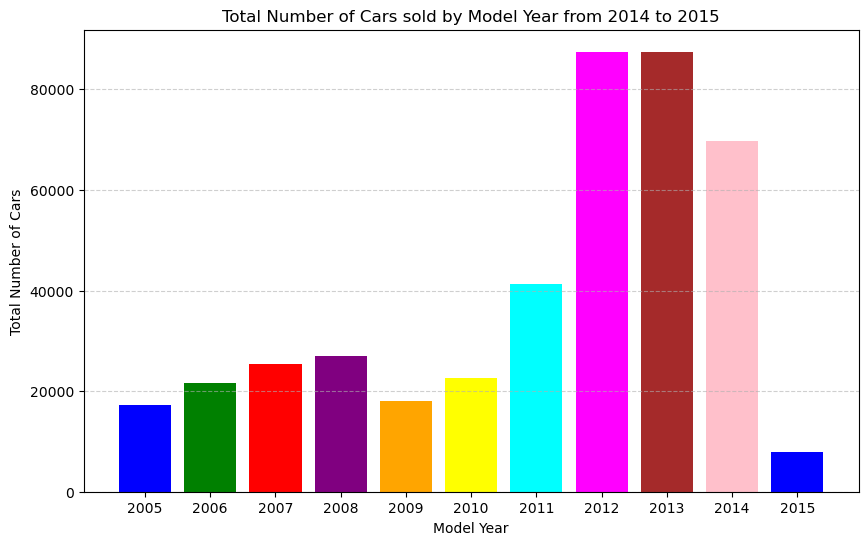

In [46]:
# Create a bar graph from 2005 to 2015 that shows cars sold and the mean of selling price
years = range(2005, 2016)
car_counts = [total_cars_by_model_year.get(year, 0) for year in years]

plt.figure(figsize=(10, 6))
plt.bar(years, car_counts, color=colors)
plt.xlabel('Model Year')
plt.ylabel('Total Number of Cars')
plt.title('Total Number of Cars sold by Model Year from 2014 to 2015')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



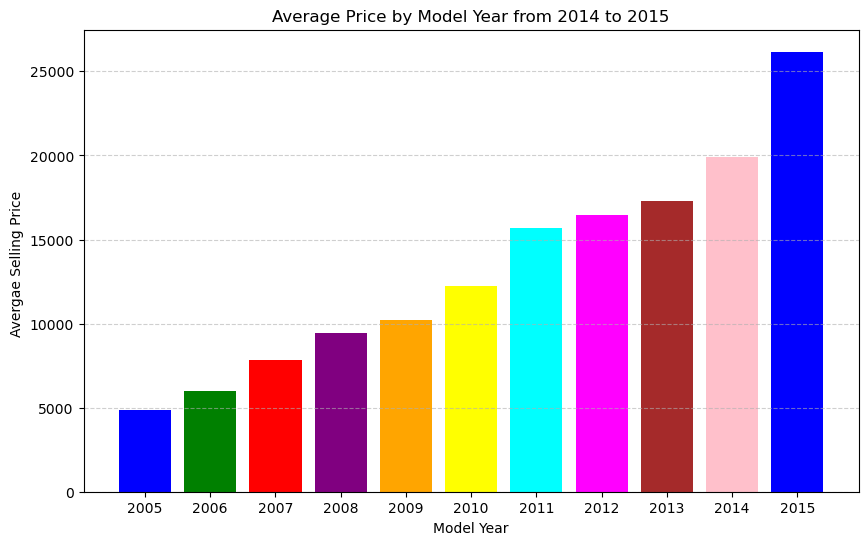

In [47]:
years = range(2005, 2016)
car_prices = [price_mean_by_year.get(year, 0) for year in years]

plt.figure(figsize=(10, 6))
plt.bar(years, car_prices, color=colors)
plt.xlabel('Model Year')
plt.ylabel('Avergae Selling Price ')
plt.title('Average Price by Model Year from 2014 to 2015')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [48]:
cars_clean_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),Sedan
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Truck
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),SUV
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Sedan


In [49]:
cars_clean_df['saledate'] = cars_clean_df['saledate'].astype(str)
cars_clean_df['month'] = cars_clean_df['saledate'].str.split().str[1]
cars_clean_df['salesyear'] = cars_clean_df['saledate'].str.split().str[3]
cars_clean_df['day'] = cars_clean_df['saledate'].str.split().str[2]
cars_clean_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type,month,salesyear,day
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV,Dec,2014,16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV,Dec,2014,16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan,Jan,2015,15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan,Jan,2015,29
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan,Dec,2014,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),Sedan,Jul,2015,07
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Truck,Jul,2015,08
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),SUV,Jul,2015,08
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Sedan,Jul,2015,09


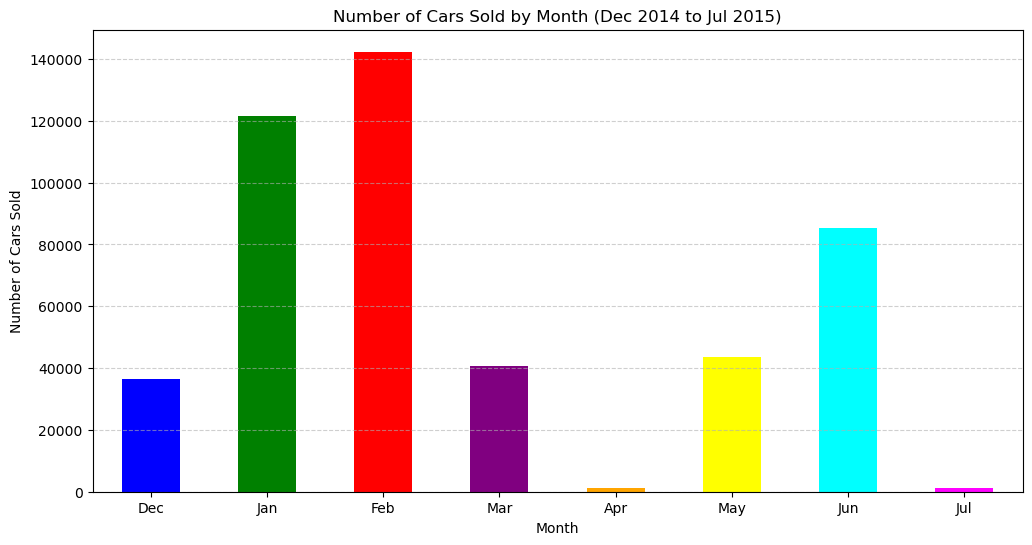

In [50]:
cars_clean_df['saledate'] = cars_clean_df['saledate'].astype(str)
cars_clean_df['month'] = cars_clean_df['saledate'].str.split().str[1]
cars_clean_df['salesyear'] = cars_clean_df['saledate'].str.split().str[3]
cars_clean_df['day'] = cars_clean_df['saledate'].str.split().str[2]
cars_clean_df
# Define the custom order of months
custom_order = ['Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

# Group by 'sale_month' and count the number of cars sold in each month
cars_sold_by_month = cars_clean_df.groupby('month').size()

# Create a bar graph for cars sold by month
plt.figure(figsize=(12, 6))
cars_sold_by_month.reindex(custom_order).plot(kind='bar', color=colors)
plt.title('Number of Cars Sold by Month (Dec 2014 to Jul 2015)')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [51]:
df_by_month = {month: group for month, group in cars_clean_df.groupby('month')}
df_by_month

{'Apr':         year       make             model     trim      body transmission  \
 6309    2014   Chrysler  Town and Country  Touring   Minivan    automatic   
 15876   2004     Nissan             Quest    3.5 S   Minivan    automatic   
 27934   2014  Chevrolet          Traverse       LT       SUV    automatic   
 40707   2005       Ford   Econoline Cargo    E-250       Van    automatic   
 41185   2003       Ford             F-150       XL  SuperCab       manual   
 ...      ...        ...               ...      ...       ...          ...   
 348878  2015  Chevrolet  Silverado 2500HD       LT  Crew Cab    automatic   
 348976  2001     Nissan            Maxima       SE     Sedan    automatic   
 348979  1997      Lexus            ES 300     Base     Sedan    automatic   
 349003  2015       Ford            Escape       SE       SUV    automatic   
 349009  2014     Toyota           Corolla       LE     Sedan    automatic   
 
                       vin state  condition  odometer  

In [52]:
top_selling_car = cars_clean_df[cars_clean_df['month'] == 'Apr'].groupby(['make', 'model'])['sellingprice'].sum().reset_index()
top_selling_car = top_selling_car.sort_values(by='sellingprice', ascending=False).head(5)
print("Top Selling Make and Model for April:")
print(top_selling_car[['make', 'model']])

Top Selling Make and Model for April:
       make   model
203  Nissan  Altima
98     Ford  Fusion
96     Ford   Focus
84     Ford  Escape
254  Toyota   Camry


In [53]:
# Group the data by 'make' and 'model', calculate the count of sales, and find the top selling make and model by count
top_selling_car_count = cars_clean_df[cars_clean_df['month'] == 'Apr'].groupby(['make', 'model','year']).size().reset_index(name='number_sold')
top_selling_car_count = top_selling_car_count.sort_values(by='number_sold', ascending=False).head(5)

# Display the top selling make and model by count
print("Top Selling Make and Model for April by Number Sold:")
print(top_selling_car_count[['make', 'model','year' ,'number_sold']].to_string(index=False))

Top Selling Make and Model for April by Number Sold:
  make   model  year  number_sold
Nissan  Altima  2012           33
Nissan   Rogue  2012           21
  Ford  Fusion  2014           18
Toyota   Camry  2012           15
  Ford Mustang  2014           13


In [54]:
#get the average selling price for a specific car(make, model, year) in the months in custom order
custom_order = ['Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

 
# Ford F-Series
 
# Toyota Camry
 
# Toyota Corolla
 
# Honda CR-V 
 
# Honda Accord


Top 5 Selling Cars for Dec:
Nissan Altima (2012): Number Sold - 519, Average Price - 11851.447013487475
Toyota Camry (2014): Number Sold - 410, Average Price - 16015.853658536585
Honda Accord (2012): Number Sold - 323, Average Price - 13432.50773993808
Nissan Altima (2013): Number Sold - 281, Average Price - 13918.338078291816
Honda Civic (2012): Number Sold - 261, Average Price - 11619.157088122605


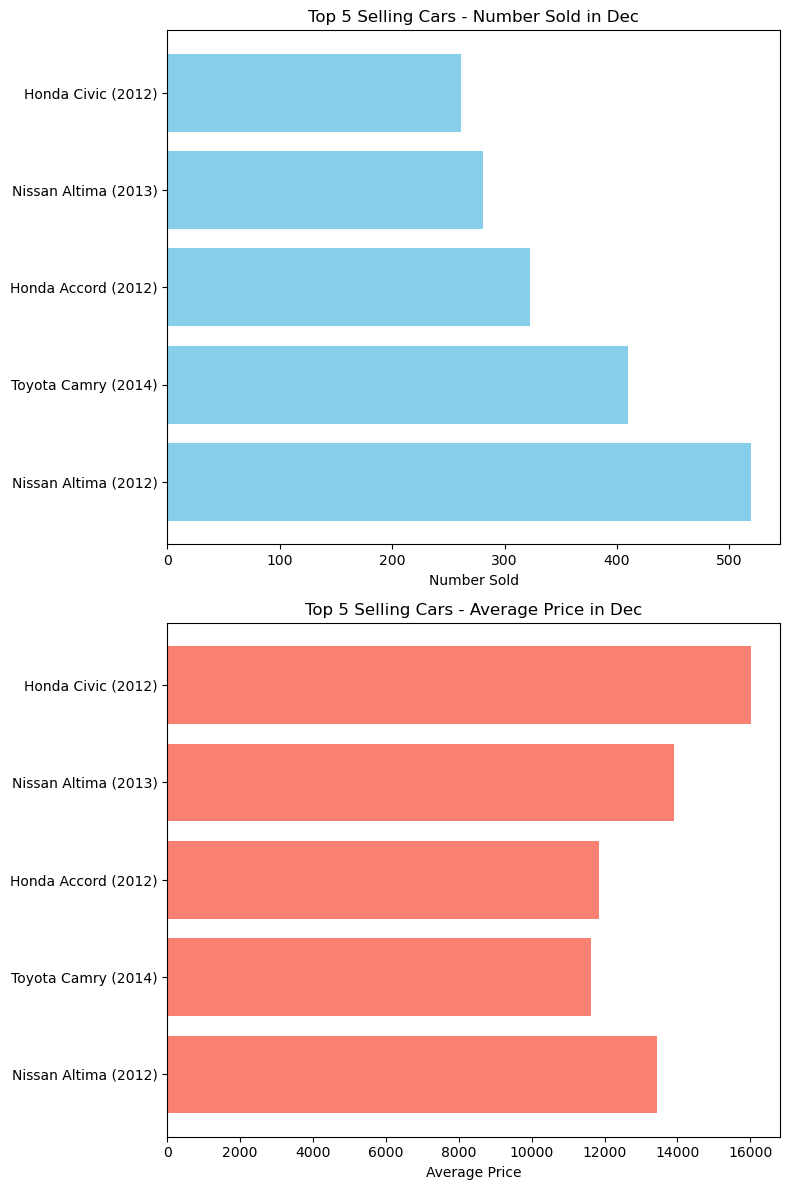

Top 5 Selling Cars for Jan:
Nissan Altima (2012): Number Sold - 1958, Average Price - 11904.216547497446
Honda Accord (2012): Number Sold - 996, Average Price - 13457.58032128514
Ford Escape (2013): Number Sold - 979, Average Price - 16413.94484167518
Ford Fusion (2012): Number Sold - 974, Average Price - 10909.396303901438
Ford Fusion (2013): Number Sold - 899, Average Price - 15020.469410456062


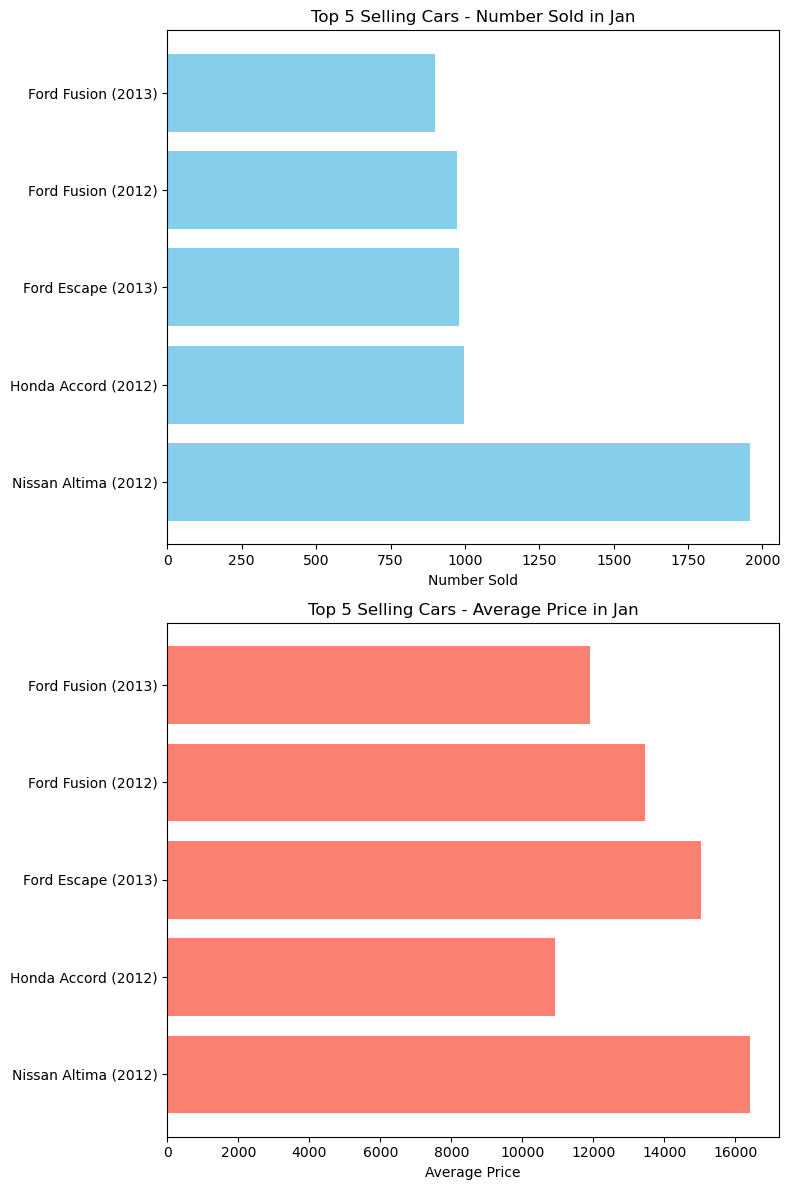

Top 5 Selling Cars for Feb:
Nissan Altima (2012): Number Sold - 2336, Average Price - 12180.031678082192
Nissan Altima (2013): Number Sold - 1484, Average Price - 13452.014824797843
Ford Fusion (2012): Number Sold - 1246, Average Price - 11003.900481540932
Ford Fusion (2013): Number Sold - 1008, Average Price - 15237.004960317461
Ford Escape (2013): Number Sold - 995, Average Price - 16572.243216080402


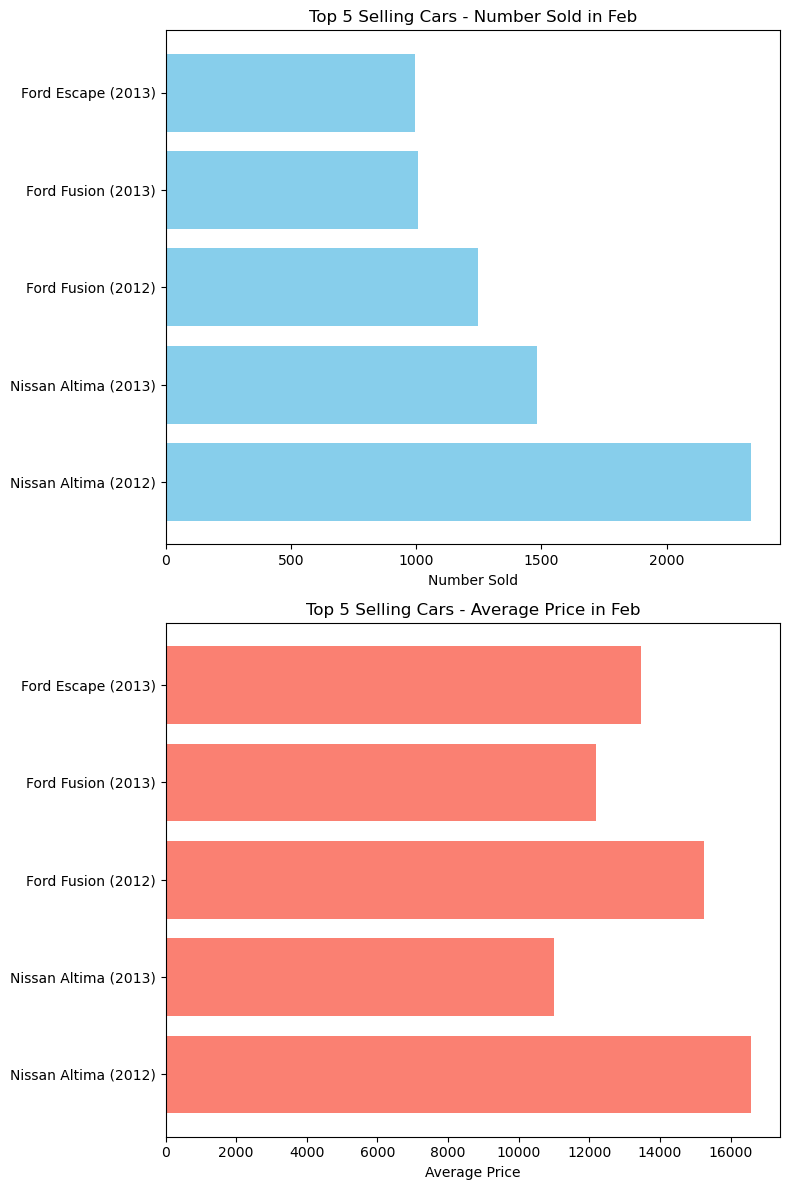

Top 5 Selling Cars for Mar:
Nissan Altima (2012): Number Sold - 756, Average Price - 12798.809523809523
Nissan Altima (2013): Number Sold - 411, Average Price - 13485.905109489051
Ford Escape (2013): Number Sold - 387, Average Price - 17291.090439276486
Ford Fusion (2014): Number Sold - 343, Average Price - 15990.08746355685
Chevrolet Cruze (2014): Number Sold - 313, Average Price - 13473.482428115016


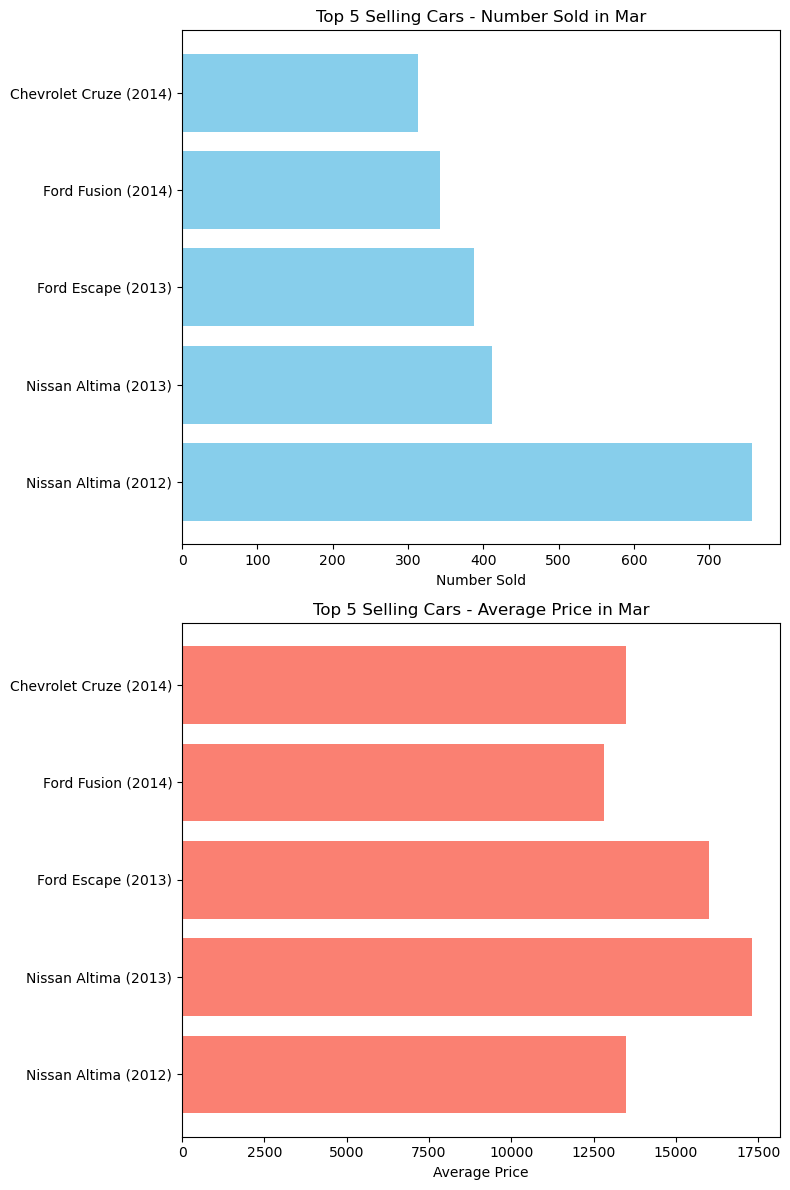

Top 5 Selling Cars for Apr:
Nissan Altima (2012): Number Sold - 33, Average Price - 14613.636363636364
Nissan Rogue (2012): Number Sold - 21, Average Price - 12130.952380952382
Ford Fusion (2014): Number Sold - 18, Average Price - 16111.111111111111
Toyota Camry (2012): Number Sold - 15, Average Price - 14126.666666666666
Ford Mustang (2014): Number Sold - 13, Average Price - 22221.153846153848


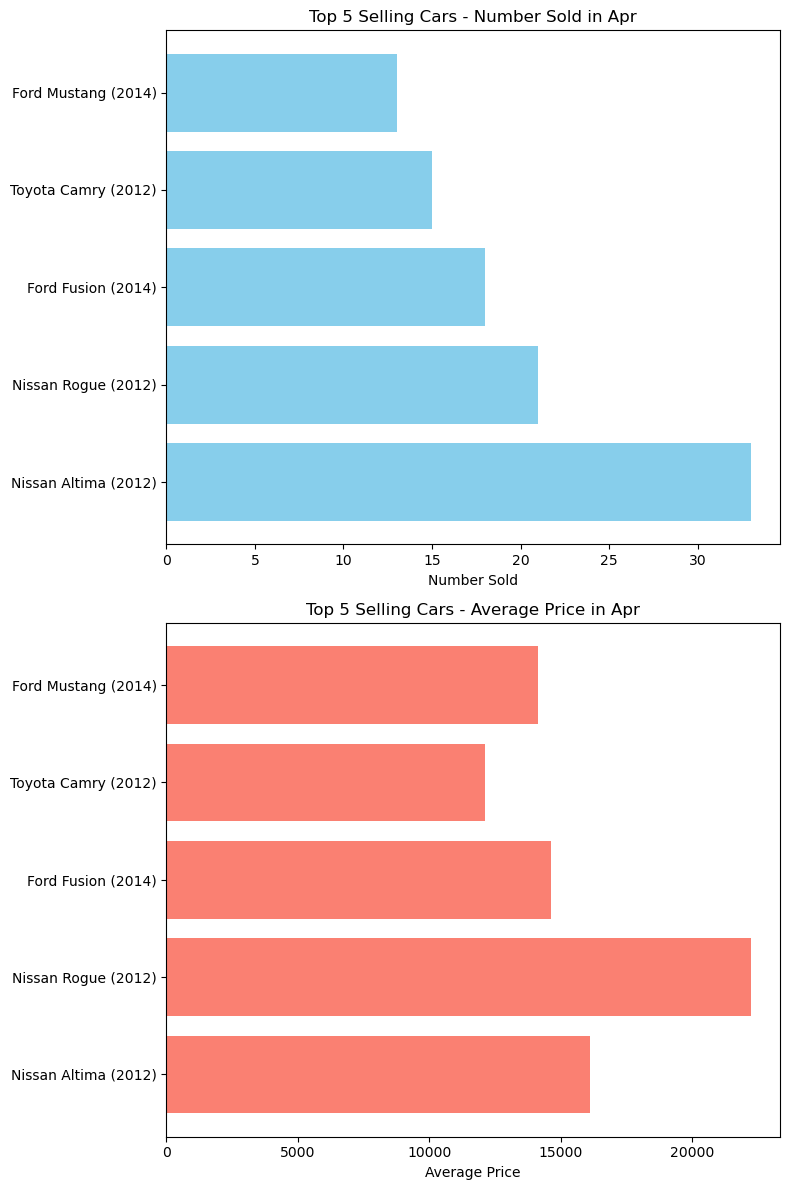

Top 5 Selling Cars for May:
Nissan Altima (2012): Number Sold - 476, Average Price - 11637.605042016807
Ford Escape (2013): Number Sold - 419, Average Price - 15595.10739856802
Nissan Rogue (2012): Number Sold - 380, Average Price - 14293.815789473685
Ford Fusion (2012): Number Sold - 377, Average Price - 11203.18302387268
Hyundai Elantra (2013): Number Sold - 360, Average Price - 11243.472222222223


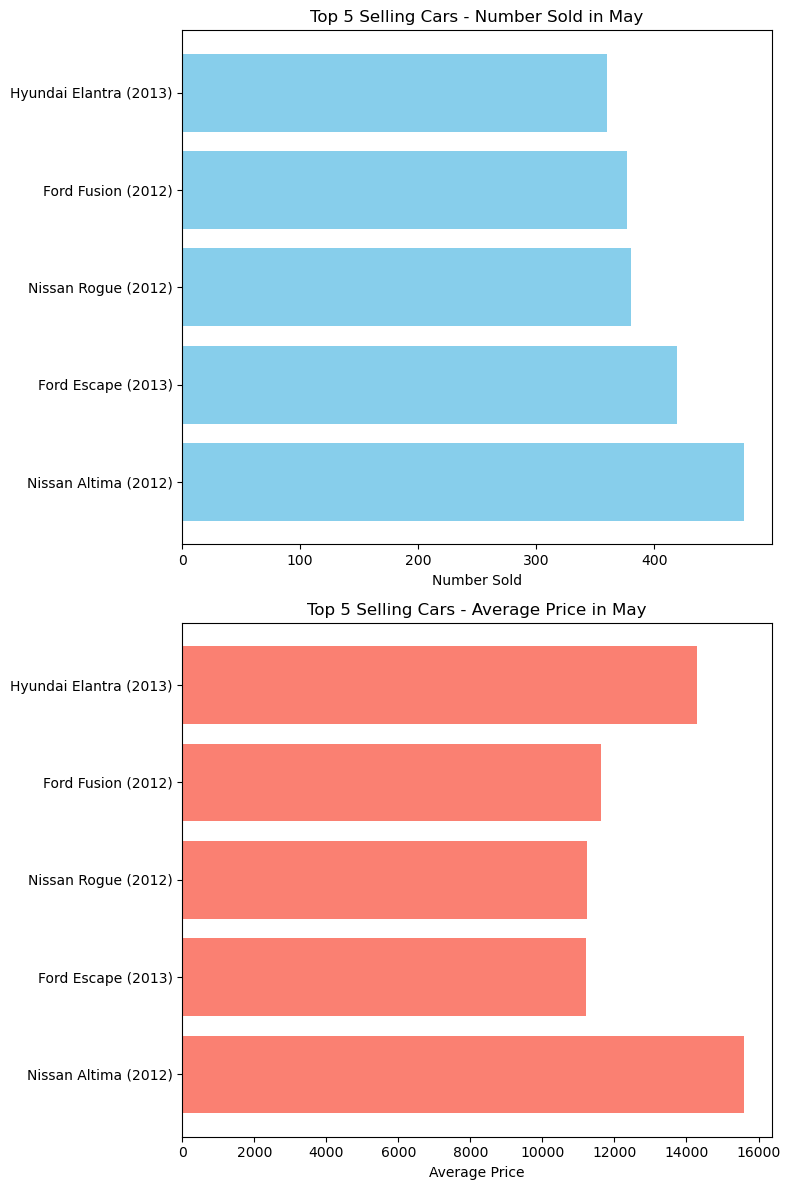

Top 5 Selling Cars for Jun:
Nissan Altima (2012): Number Sold - 1000, Average Price - 11625.0
Nissan Altima (2013): Number Sold - 847, Average Price - 12542.159386068477
Toyota Camry (2012): Number Sold - 832, Average Price - 13381.432692307691
Hyundai Elantra (2013): Number Sold - 804, Average Price - 11275.594527363184
Infiniti G Sedan (2012): Number Sold - 760, Average Price - 18277.10657894737


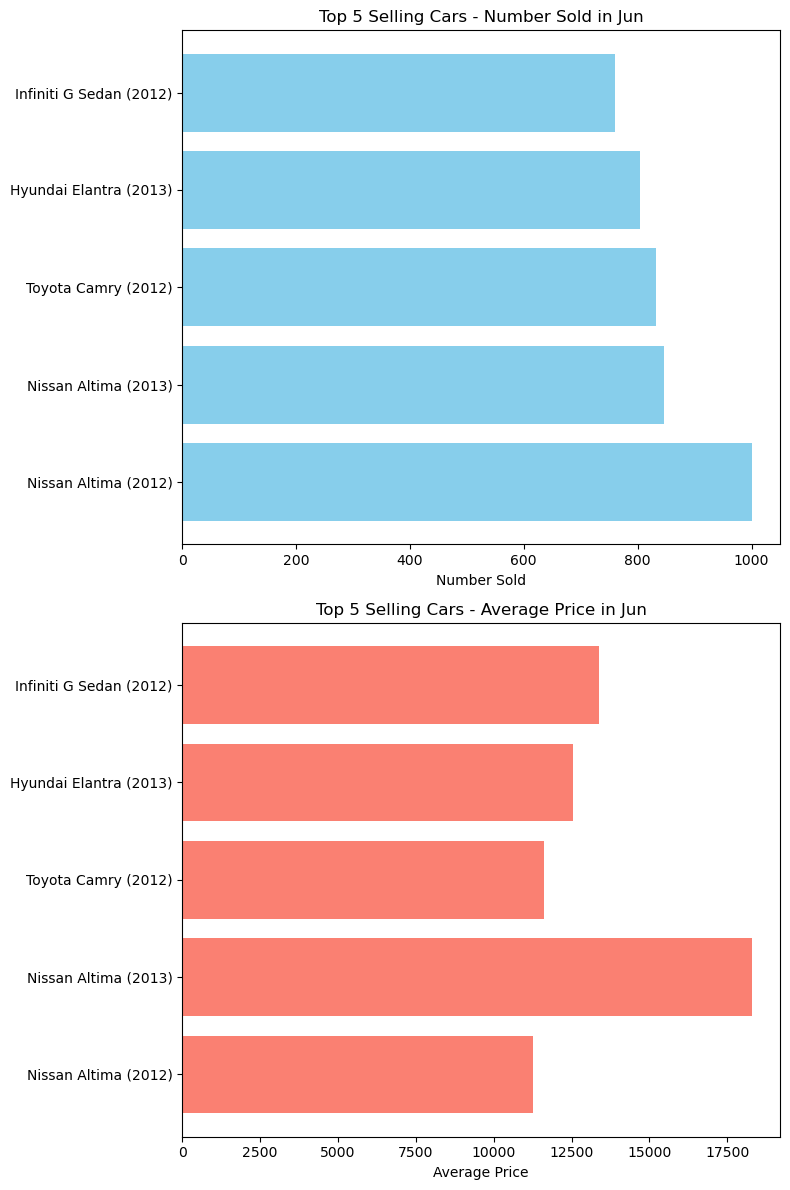

Top 5 Selling Cars for Jul:
Ford Fusion (2014): Number Sold - 13, Average Price - 18576.923076923078
Ford Mustang (2014): Number Sold - 13, Average Price - 18588.46153846154
Ford Explorer (2013): Number Sold - 13, Average Price - 26153.846153846152
Dodge Grand Caravan (2013): Number Sold - 12, Average Price - 12175.0
Ford Fusion (2012): Number Sold - 12, Average Price - 10858.333333333334


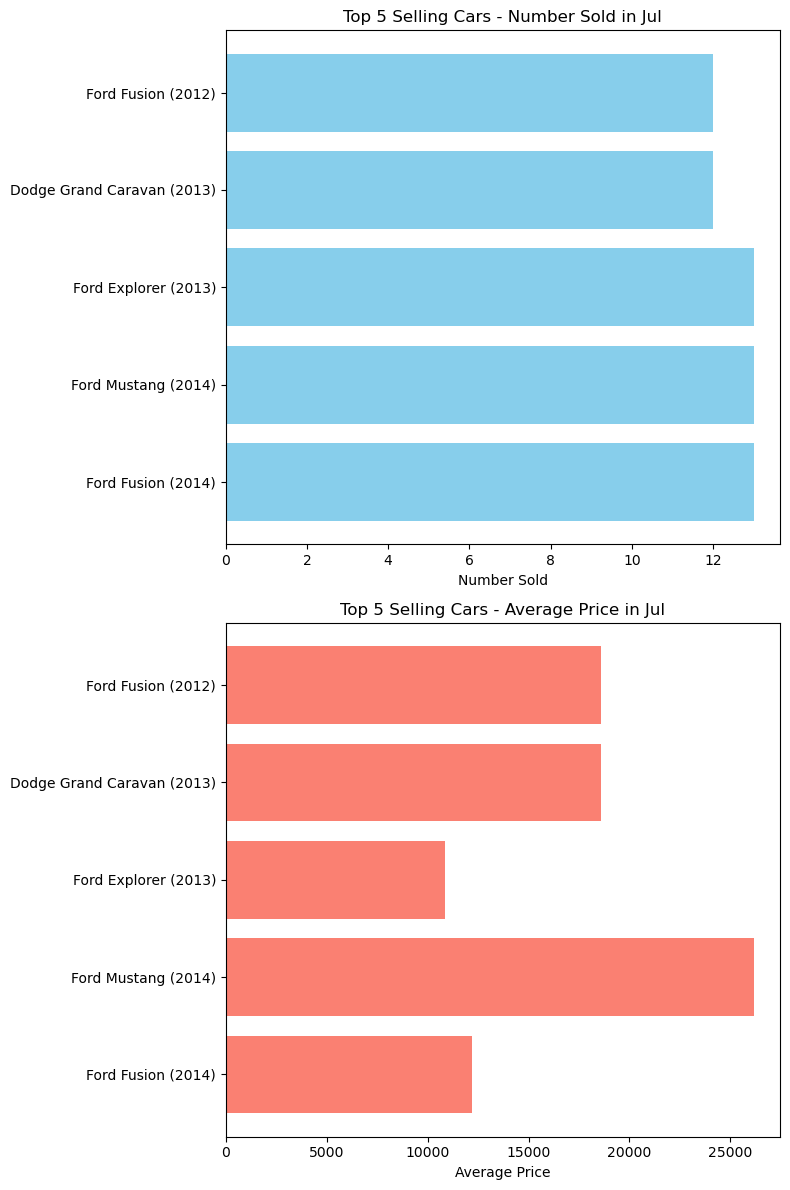

In [55]:
# Define the custom order for months
custom_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

for month in custom_order:
    top_selling_car_count = cars_clean_df[cars_clean_df['month'] == month].groupby(['make', 'model', 'year']).size().reset_index(name='number_sold')
    top_selling_car_count = top_selling_car_count.sort_values(by='number_sold', ascending=False).head(5)

    # Merge with the original DataFrame to get selling prices
    top_selling_cars_prices = pd.merge(top_selling_car_count, cars_clean_df[cars_clean_df['month'] == month], on=['make', 'model', 'year'], how='inner')

    # Calculate average selling price per car
    avg_prices = top_selling_cars_prices.groupby(['make', 'model', 'year']).agg(avg_price=('sellingprice', 'mean')).reset_index()

    # Display the top 5 selling cars for each month
    print(f"Top 5 Selling Cars for {month}:")
    for index, row in top_selling_car_count.iterrows():
        make = row['make']
        model = row['model']
        year = row['year']
        number_sold = row['number_sold']
        avg_price = avg_prices[(avg_prices['make'] == make) & (avg_prices['model'] == model) & (avg_prices['year'] == year)]['avg_price'].values[0]
        print(f"{make} {model} ({year}): Number Sold - {number_sold}, Average Price - {avg_price}")

    # Create separate bar graphs for count and average price for the top 5 cars in each month
    fig, axs = plt.subplots(2, 1, figsize=(8, 12))

    # Bar graph for number of cars sold
    axs[0].barh([f"{make} {model} ({year})" for make, model, year in zip(top_selling_car_count['make'], top_selling_car_count['model'], top_selling_car_count['year'])], top_selling_car_count['number_sold'], color='skyblue')
    axs[0].set_xlabel('Number Sold')
    axs[0].set_title(f'Top 5 Selling Cars - Number Sold in {month}')

    # Bar graph for average price per car
    axs[1].barh([f"{make} {model} ({year})" for make, model, year in zip(top_selling_car_count['make'], top_selling_car_count['model'], top_selling_car_count['year'])], avg_prices['avg_price'], color='salmon')
    axs[1].set_xlabel('Average Price')
    axs[1].set_title(f'Top 5 Selling Cars - Average Price in {month}')

    plt.tight_layout()
    
    # Save the figure as a PNG file
    plt.savefig(f'{month}_top_5_selling_cars.png')
    
    plt.show()


In [56]:
# custom_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
# first_month = custom_order[0]  # Get the first month from the custom order
# top_selling_cars_first_month = cars_clean_df[cars_clean_df['month'] == first_month].groupby(['make', 'model', 'year']).size().reset_index(name='number_sold')
# top_selling_cars_first_month = top_selling_cars_first_month.sort_values(by='number_sold', ascending=False).head(5)
# tracked_cars = top_selling_cars_first_month[['make', 'model']]  # Store the make and model of the top cars
# #Iterate over the months and filter the data for the tracked cars:
# for month in custom_order:
#     top_selling_car_count = cars_clean_df[(cars_clean_df['month'] == month) & 
#                                           (cars_clean_df['make'].isin(tracked_cars['make'])) & 
#                                           (cars_clean_df['model'].isin(tracked_cars['model']))].groupby(['make', 'model', 'year']).size().reset_index(name='number_sold')
#     top_selling_car_count = top_selling_car_count.sort_values(by='number_sold', ascending=False).head(5)

#         # Merge with the original DataFrame to get selling prices
#     top_selling_cars_prices = pd.merge(top_selling_car_count, cars_clean_df[cars_clean_df['month'] == month], on=['make', 'model', 'year'], how='inner')

#     # Calculate average selling price per car
#     avg_prices = top_selling_cars_prices.groupby(['make', 'model', 'year']).agg(avg_price=('sellingprice', 'mean')).reset_index()

#     # Display the top 5 selling cars for each month
#     print(f"Top 5 Selling Cars for {month}:")
#     for index, row in top_selling_car_count.iterrows():
#         make = row['make']
#         model = row['model']
#         year = row['year']
#         number_sold = row['number_sold']
#         avg_price = avg_prices[(avg_prices['make'] == make) & (avg_prices['model'] == model) & (avg_prices['year'] == year)]['avg_price'].values[0]
#         print(f"{make} {model} ({year}): Number Sold - {number_sold}, Average Price - {avg_price}")

#     # Create separate bar graphs for count and average price for the top 5 cars in each month
#     fig, axs = plt.subplots(2, 1, figsize=(8, 12))

#     # Bar graph for number of cars sold
#     axs[0].barh([f"{make} {model} ({year})" for make, model, year in zip(top_selling_car_count['make'], top_selling_car_count['model'], top_selling_car_count['year'])], top_selling_car_count['number_sold'], color='skyblue')
#     axs[0].set_xlabel('Number Sold')
#     axs[0].set_title(f'Top 5 Selling Cars - Number Sold in {month}')

#     # Bar graph for average price per car
#     axs[1].barh([f"{make} {model} ({year})" for make, model, year in zip(top_selling_car_count['make'], top_selling_car_count['model'], top_selling_car_count['year'])], avg_prices['avg_price'], color='salmon')
#     axs[1].set_xlabel('Average Price')
#     axs[1].set_title(f'Top 5 Selling Cars - Average Price in {month}')

#     plt.tight_layout()
    
#     # Save the figure as a PNG file
#     plt.savefig(f'{month}_top_5_selling_cars from Dec.png')
    
#     plt.show()

In [57]:
# # Define the custom order for months
# custom_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

# # Get the first month's top selling cars
# first_month = custom_order[0]
# top_selling_cars_first_month = cars_clean_df[cars_clean_df['month'] == first_month].groupby(['make', 'model', 'year']).size().reset_index(name='number_sold')
# top_selling_cars_first_month = top_selling_cars_first_month.sort_values(by='number_sold', ascending=False).head(5)
# tracked_cars = top_selling_cars_first_month[['make', 'model']].values

# # Iterate over the tracked cars
# for make, model in tracked_cars:
#     car_data = []  # Store average price data for the car
#     for month in custom_order:
#         car_month_data = cars_clean_df[(cars_clean_df['month'] == month) & 
#                                        (cars_clean_df['make'] == make) & 
#                                        (cars_clean_df['model'] == model)]
#         avg_price = car_month_data['sellingprice'].mean()
#         car_data.append(avg_price)

#     # Create a line plot for the car tracking average price every month
#     plt.figure(figsize=(10, 6))
#     plt.plot(custom_order, car_data, marker='o', label=f'{make} {model}')
#     plt.xlabel('Month')
#     plt.ylabel('Average Price')
#     plt.title(f'Average Price Tracking for {make} {model}')
#     plt.legend()
#     plt.tight_layout()

#     # Save the figure as a PNG file
#     plt.savefig(f'{make}_{model}_avg_price_tracking.png')

#     plt.show()

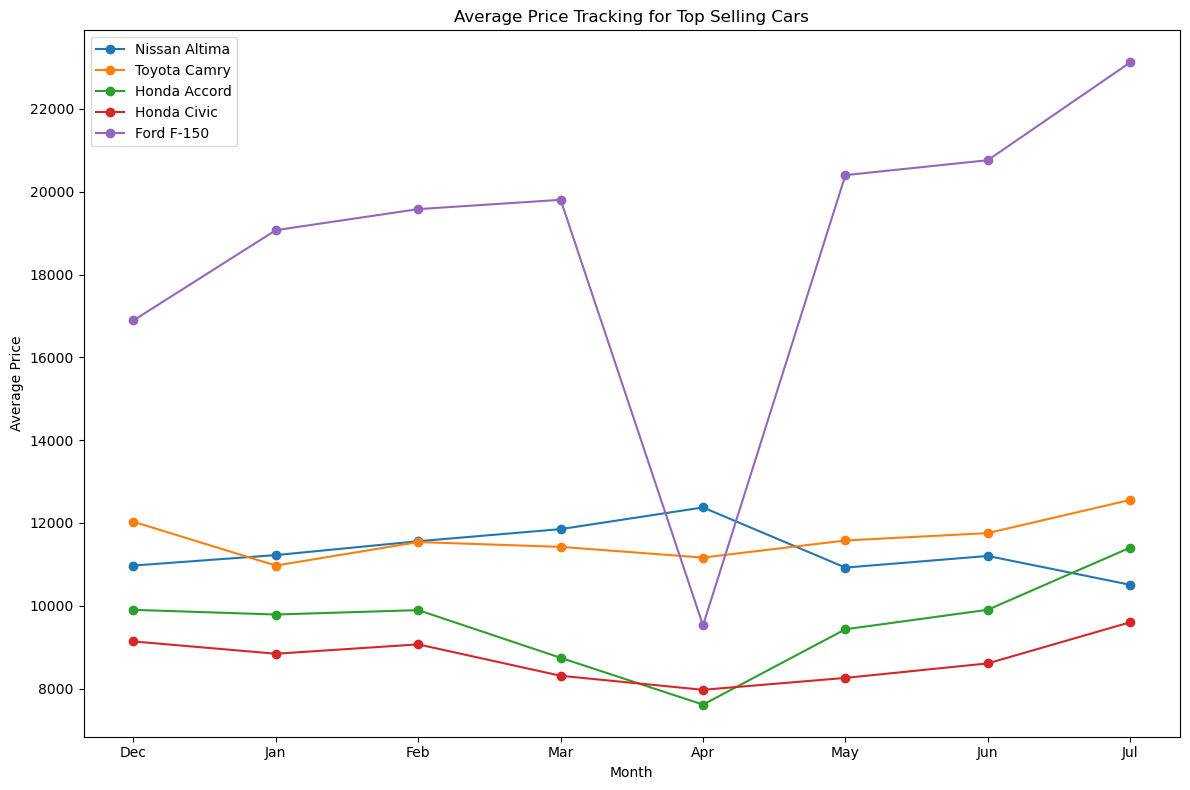

In [60]:


import matplotlib.pyplot as plt

# Define the custom order for months
custom_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

# Get the first month's top selling cars
first_month = custom_order[0]
top_selling_cars_first_month = cars_clean_df[cars_clean_df['month'] == first_month].groupby(['make', 'model']).size().reset_index(name='number_sold')
top_selling_cars_first_month = top_selling_cars_first_month.sort_values(by='number_sold', ascending=False).head(5)
tracked_cars = top_selling_cars_first_month[['make', 'model']].values

# Create a line plot for all tracked cars in one graph
plt.figure(figsize=(12, 8))

for make, model in tracked_cars:
    car_data = []  # Store average price data for the car
    for month in custom_order:
        car_month_data = cars_clean_df[(cars_clean_df['month'] == month) & 
                                       (cars_clean_df['make'] == make) & 
                                       (cars_clean_df['model'] == model)]
        avg_price = car_month_data['sellingprice'].mean()
        car_data.append(avg_price)

    plt.plot(custom_order, car_data, marker='o', label=f'{make} {model}')

plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Tracking for Top Selling Cars')
plt.legend()
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('all_tracked_cars_avg_price_tracking.png')

plt.show()

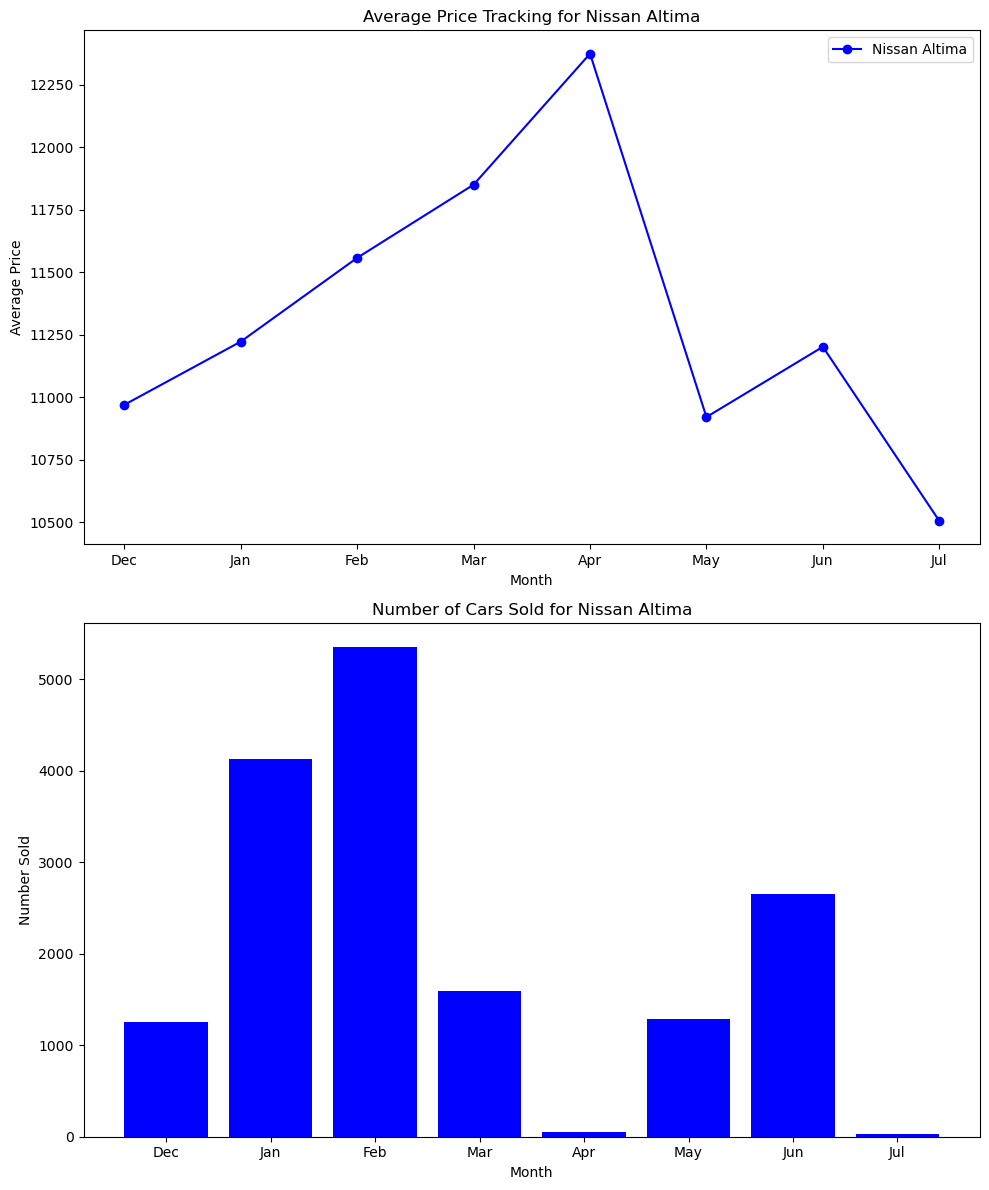

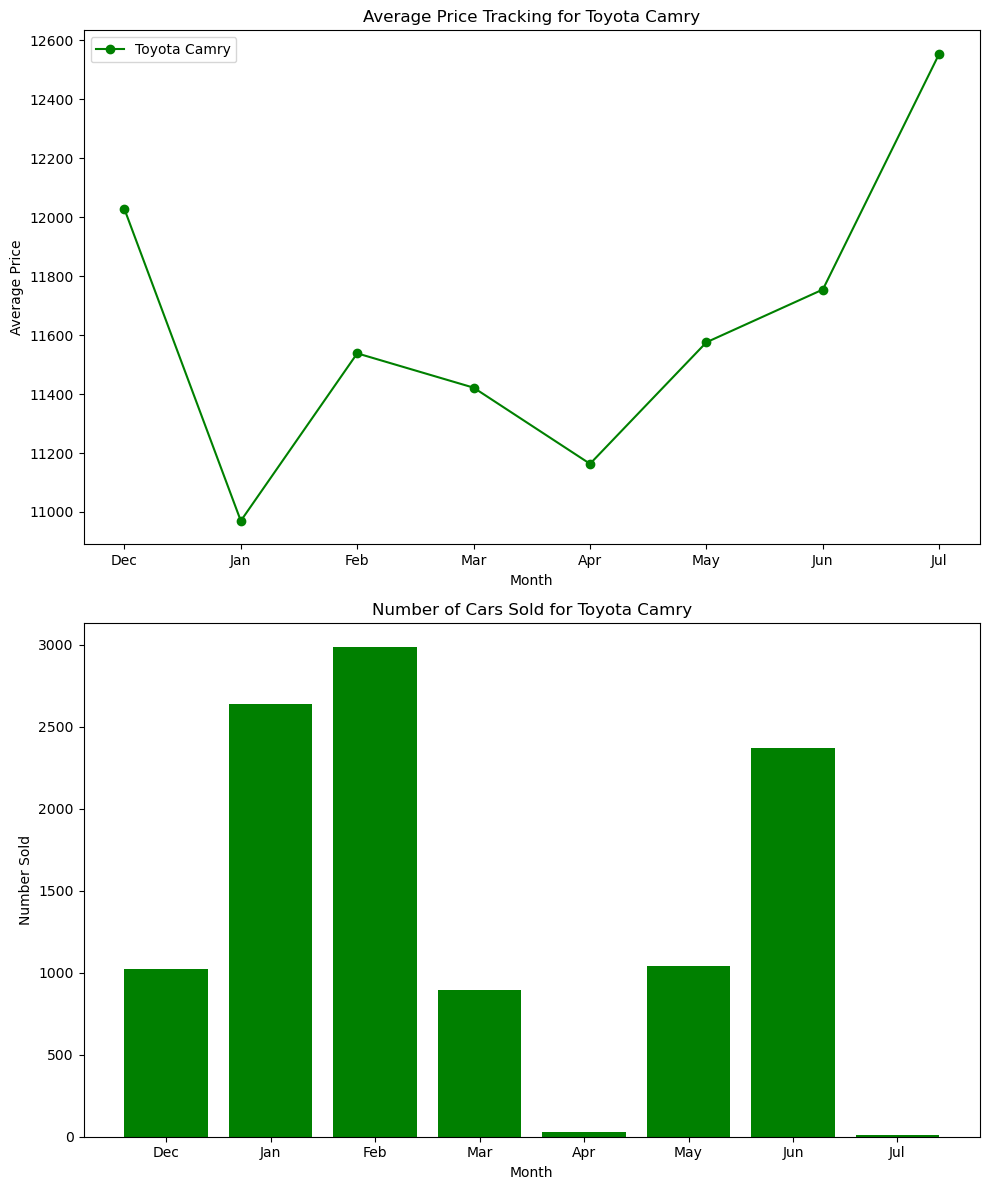

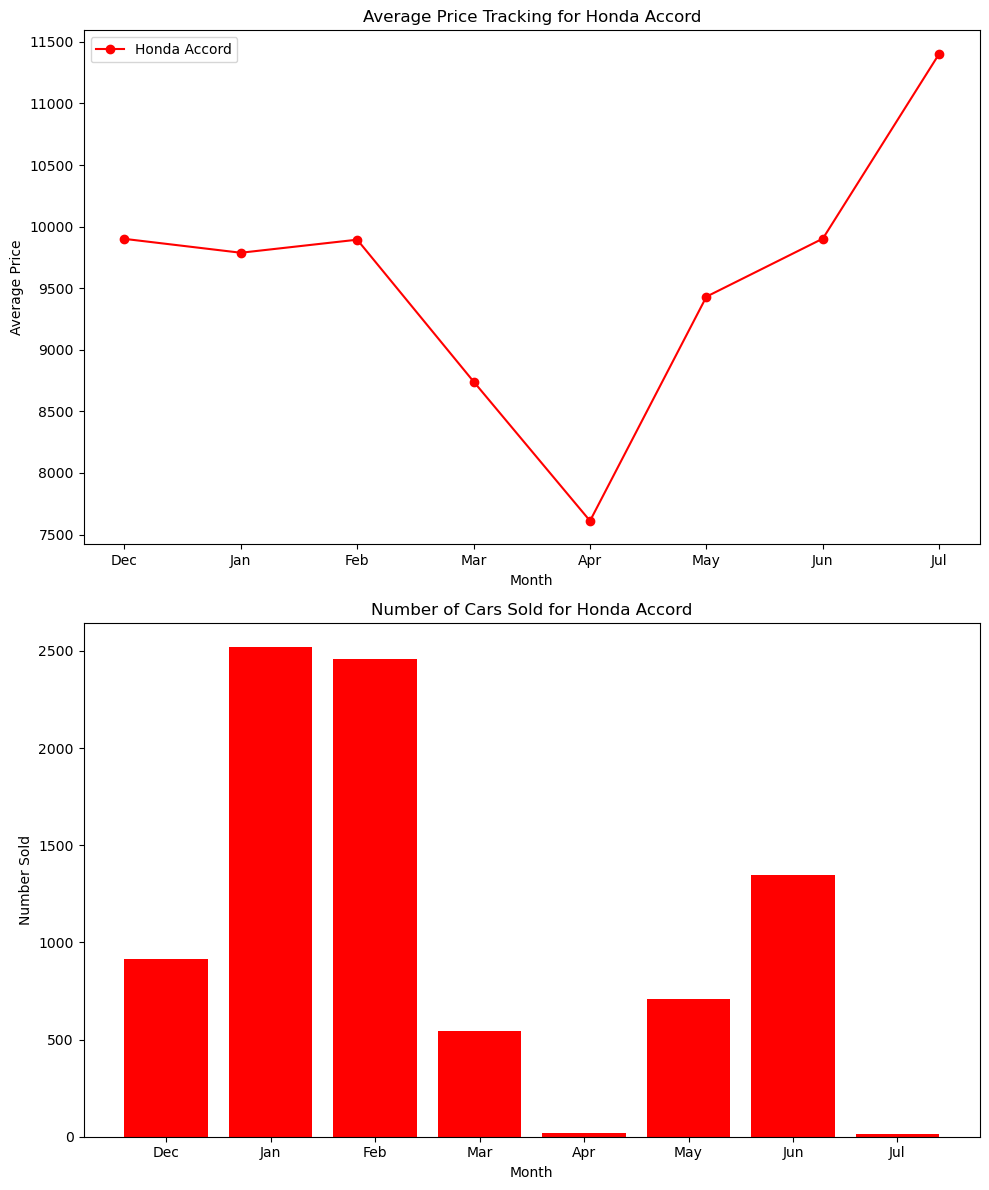

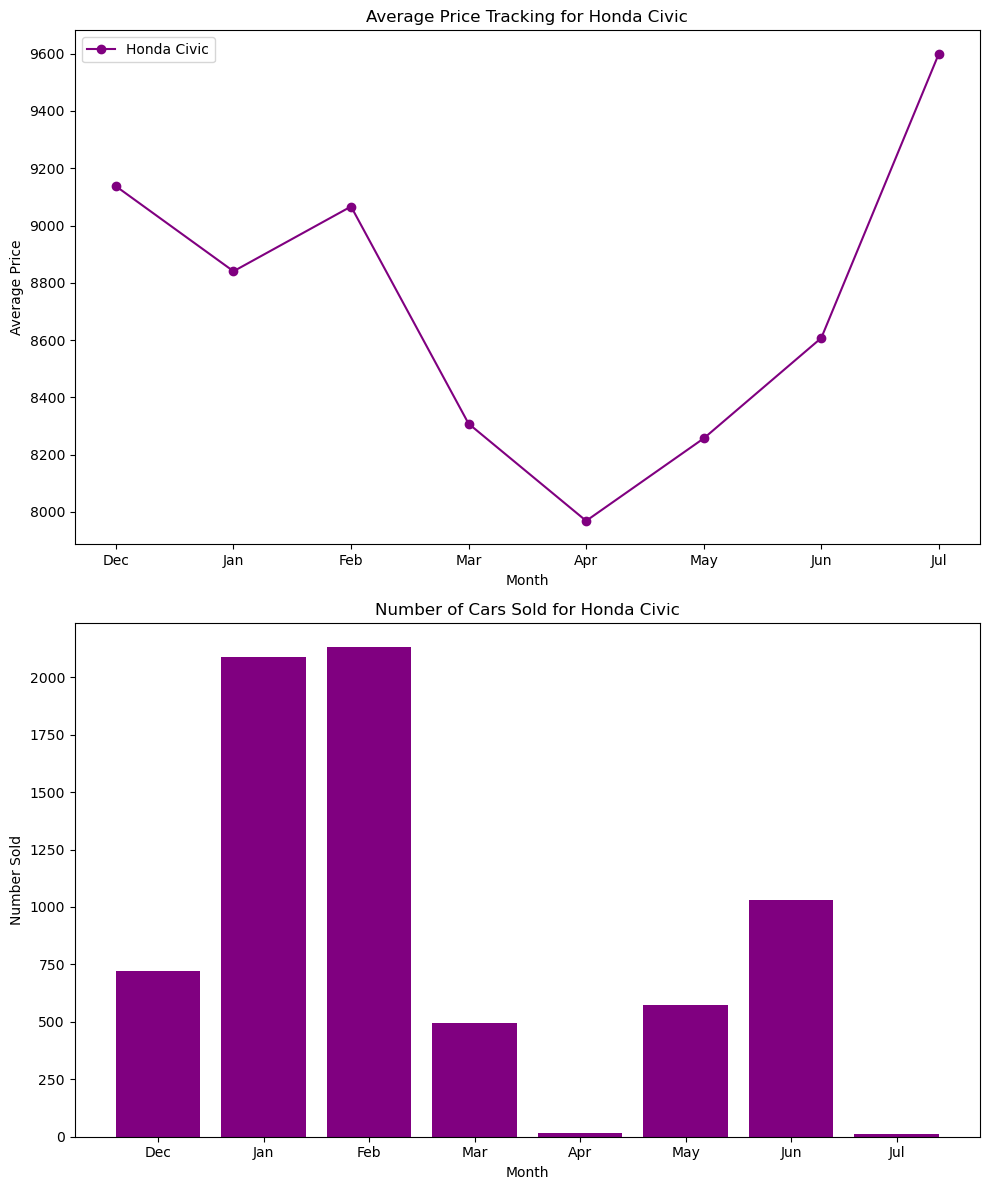

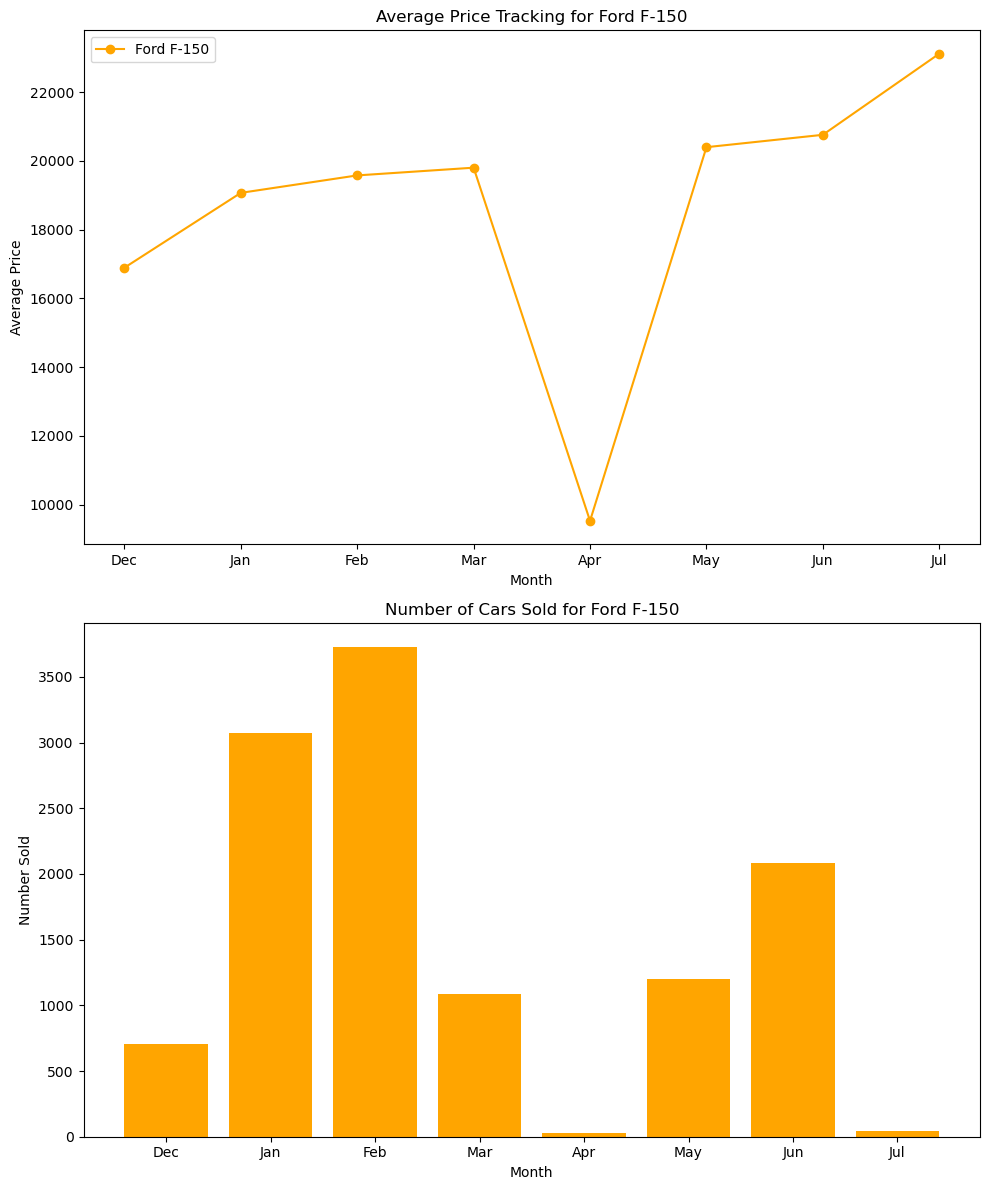

In [59]:
# Define the custom order for months
custom_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

# Get the first month's top selling cars
first_month = custom_order[0]
top_selling_cars_first_month = cars_clean_df[cars_clean_df['month'] == first_month].groupby(['make', 'model']).size().reset_index(name='number_sold')
top_selling_cars_first_month = top_selling_cars_first_month.sort_values(by='number_sold', ascending=False).head(5)
tracked_cars = top_selling_cars_first_month[['make', 'model']].values

# Define colors for each tracked car
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate over the tracked cars
for i, (make, model) in enumerate(tracked_cars):
    car_data = []  # Store average price data for the car
    number_sold_data = []  # Store number of cars sold data for the car
    for month in custom_order:
        car_month_data = cars_clean_df[(cars_clean_df['month'] == month) & 
                                       (cars_clean_df['make'] == make) & 
                                       (cars_clean_df['model'] == model)]
        avg_price = car_month_data['sellingprice'].mean()
        car_data.append(avg_price)
        number_sold = len(car_month_data)
        number_sold_data.append(number_sold)

    # Create subplots for the line graph and bar graph
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Line graph for average price tracking
    ax1.plot(custom_order, car_data, marker='o', label=f'{make} {model}', color=colors[i])
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Price')
    ax1.set_title(f'Average Price Tracking for {make} {model}')
    ax1.legend()

    # Bar graph for number of cars sold
    ax2.bar(custom_order, number_sold_data, color=colors[i])
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Number Sold')
    ax2.set_title(f'Number of Cars Sold for {make} {model}')

    plt.tight_layout()

    # Save the figure as a PNG file
    plt.savefig(f'{make}_{model}_avg_price_number_sold_tracking.png')

    plt.show()